# Projet 3 : Anticipez les besoins en consommation électrique de bâtiments
# Analyse Exploratoire

## 1. Importation des données

### 1.1. Chargement des librairies

In [2]:
# Manipulation des données
import numpy as np
import pandas as pd

# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # style choisi pour les graphes

# Libraire scipy pour calcul de Chi2
import scipy.stats as st

# Ignorer les warnings
import warnings
warnings.filterwarnings(action='ignore')

### 1.2. Chargement des données

In [3]:
# 2 datasets à disposition
data_2015 = pd.read_csv("2015-building-energy-benchmarking.csv")
data_2016 = pd.read_csv("2016-building-energy-benchmarking.csv")

In [4]:
# afficher sur 60 lignes
pd.set_option('display.max_row',60)

# afficher sur 47 colonnes
pd.set_option('display.max_column',47)

In [5]:
# Aperçu du dataset 2015
data_2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL                     659000030   
1        PARAMOUNT HOTEL                     659000220   
2           WESTIN HOTEL                     659000475   
3              HOTEL MAX                     659000640   
4  WARWICK SEATTLE HOTEL                     659000970   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   
3  {'latitude': '47.61421585', 'longitude': '-122...                    7   
4  {'latitude': '47.6137544', 'longitude': '-122....                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   
3     DOWNTOWN       1926                  1            10.0   
4     DOWNTOWN       1980                  1            18.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   
3             61320                   0                   61320   
4            119890               12460                  107430   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   
3                          Hotel                  Hotel   
4  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   
3                    61320.0                          NaN   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   
3                              NaN                         NaN   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   
3                             NaN                      NaN              1.0   
4                             0.0                      NaN             67.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   
3             460.4               462.5               636.3   
4             120.1               122.1               228.8   

   SourceEUIWN(kBtu/sf)  SiteEner

In [6]:
# Aperçu du dataset 2016
data_2016.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

## 2. Description des données

In [7]:
# Copie des datasets
df_2015 = data_2015.copy()
df_2016 = data_2016.copy()

### 2.1. Structure des données

In [8]:
# taille
df_2015.shape

(3340, 47)

In [9]:
# taille
df_2016.shape

(3376, 46)

Le dataset de 2016 comporte plus de lignes et une colonne en moins.

In [10]:
# type de variables
df_2015.dtypes.value_counts()

float64    23
object     15
int64       9
dtype: int64

In [11]:
# type de variables
df_2016.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

Pour 2015 : 32 variables quantitatives et 15 qualitatives 

Pour 2016 : 30 quantitatives et 16 qualitatives (dont 1 booléenne)

In [12]:
# info sur les colonnes
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [13]:
# info sur les colonnes
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

L'intitulé de certaines colonnes ne sont pas les mêmes entre les 2 datasets.

#### Survol rapide des valeurs manquantes

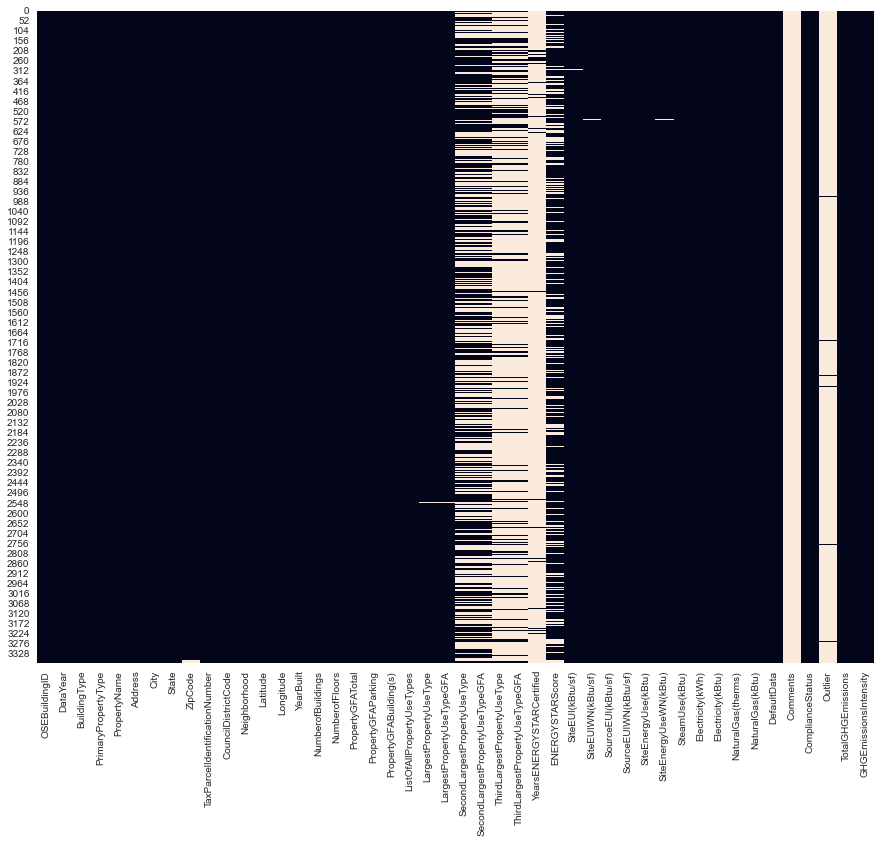

In [14]:
# Valeurs manquantes affichées dans une heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df_2016.isna(), cbar = False)
plt.show()

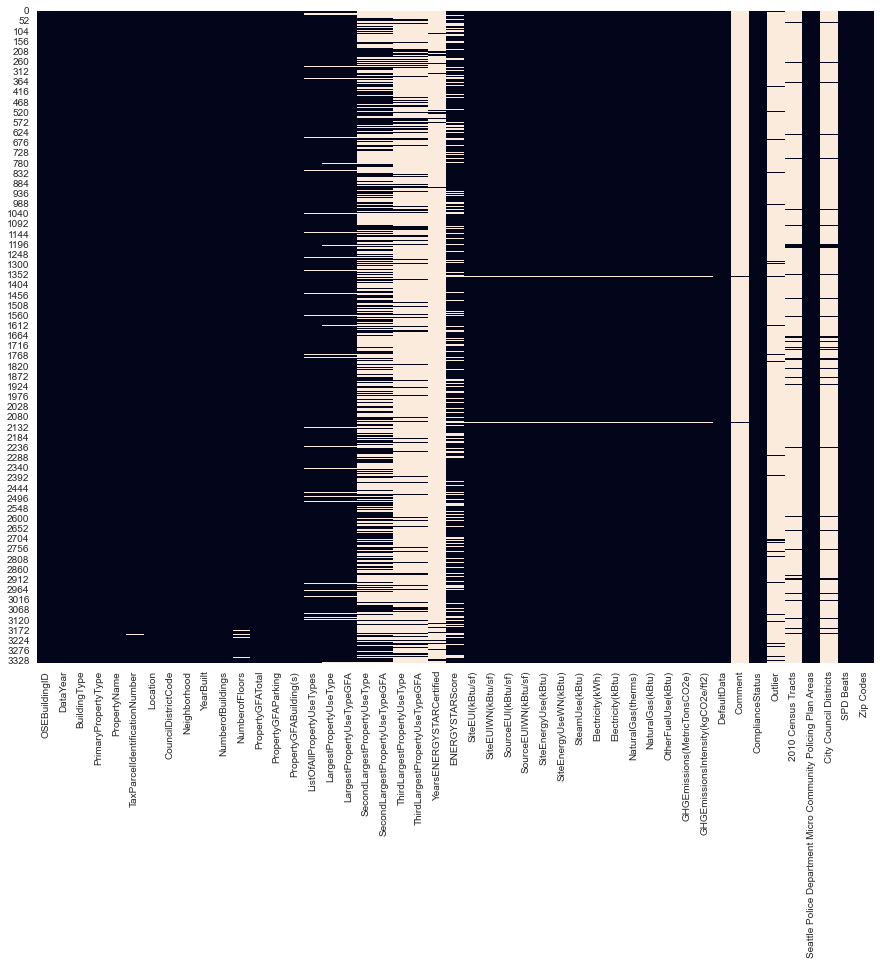

In [15]:
# Valeurs manquantes affichées dans une heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df_2015.isna(), cbar = False)
plt.show()

Il y a plus de colonnes avec des valeurs manquantes dans le dataset de 2015. On voit des "groupes" de valeurs manquantes (lignes blanches).

In [16]:
# Fonction pour retourner le pourcentage de valeurs manquantes d'un dataframe
# prend en paramètre le dataframe df

def perc_missing(df) :
    return (df.isna().sum()/df.shape[0] *100).sort_values(ascending = False)

In [17]:
perc_missing(df_2016)

Comments                           100.000000
Outlier                             99.052133
YearsENERGYSTARCertified            96.475118
ThirdLargestPropertyUseType         82.345972
ThirdLargestPropertyUseTypeGFA      82.345972
SecondLargestPropertyUseType        50.266588
SecondLargestPropertyUseTypeGFA     50.266588
ENERGYSTARScore                     24.970379
LargestPropertyUseTypeGFA            0.592417
LargestPropertyUseType               0.592417
ZipCode                              0.473934
ListOfAllPropertyUseTypes            0.266588
SourceEUIWN(kBtu/sf)                 0.266588
SourceEUI(kBtu/sf)                   0.266588
Electricity(kWh)                     0.266588
Electricity(kBtu)                    0.266588
NaturalGas(therms)                   0.266588
NaturalGas(kBtu)                     0.266588
TotalGHGEmissions                    0.266588
SteamUse(kBtu)                       0.266588
GHGEmissionsIntensity                0.266588
NumberofBuildings                 

In [18]:
perc_missing(df_2015)

Comment                                                          99.610778
Outlier                                                          97.485030
YearsENERGYSTARCertified                                         96.706587
City Council Districts                                           93.622754
2010 Census Tracts                                               93.293413
ThirdLargestPropertyUseTypeGFA                                   83.233533
ThirdLargestPropertyUseType                                      83.233533
SecondLargestPropertyUseTypeGFA                                  53.323353
SecondLargestPropertyUseType                                     53.323353
ENERGYSTARScore                                                  23.353293
LargestPropertyUseTypeGFA                                         4.071856
LargestPropertyUseType                                            4.071856
ListOfAllPropertyUseTypes                                         3.802395
GHGEmissionsIntensity(kgC

Dans les 2 datasets, on a des "groupes" de valeurs manquantes.

On remarque qu'environ 25% des données n'ont pas ENERGYSTARScore.

### 2.2. Fusion des deux datasets

#### Comparaison des OSEBuildingID

On va regarder si il y a des OSEBuildingID de 2015 qui ne sont pas dans 2016 et vice versa.

In [19]:
df2015_ID = [ID for ID in df_2015['OSEBuildingID'] if ID not in df_2016['OSEBuildingID'].values]
len(df2015_ID)

56

In [20]:
df2016_ID = [ID for ID in df_2016['OSEBuildingID'] if ID not in df_2015['OSEBuildingID'].values]
len(df2016_ID)

92

56 batiments du dataset de 2015 ne sont pas dans celui de 2016.

92 batiments du dataset de 2016 ne sont pas dans celui de 2015.

#### Comparaison des colonnes

In [21]:
# Colonnes de 2015 qui ne sont pas dans 2016
[col for col in df_2015 if col not in df_2016]

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [22]:
# Colonnes de 2016 qui ne sont pas dans 2015
[col for col in df_2016 if col not in df_2015]

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [23]:
# Colonnes communes
[col for col in df_2016 if col in df_2015]

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

La majorité des colonnes (80%) sont communes aux 2 datasets.

#### Renommage de colonnes

On renomme GHGEmissions(MetricTonsCO2e) et GHGEmissionsIntensity(kgCO2e/ft2) dans le dataset de 2015 pour que les noms des variables soient les mêmes que pour 2016 (TotalGHGEmissions et GHGEmissionsIntensity), ainsi que la colonne Comment.

In [24]:
df_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                        'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity',
                        'Comment': 'Comments'},
               inplace=True)

#### Colonne Location dans le dataset de 2015

In [25]:
# Transformation de la colonne Location en Latitude et Longitude dans le dataset de 2015
latitude = []
longitude = []
for loc in df_2015['Location']:
    latitude.append(float(loc.split(":")[1].split("'")[1]))
    longitude.append(float(loc.split(':')[2].split("'")[1]))

df_2015.drop(columns=['Location'], inplace=True)
df_2015['Longitude'] = longitude
df_2015['Latitude'] = latitude

#### Suppression de colonnes
On supprime les colonnes de 2015 qui ne sont pas dans 2016 (beaucoup de valeurs manquantes, et pour Seattle Police Department Micro Community Policing Plan Areas, information redondante avec les colonnes de localisation).

In [26]:
df_2015.drop(columns=[col for col in df_2015 if col not in df_2016], inplace=True)

On supprime les colonnes City et State de 2016 car il s'agit de la même ville. On supprime également la colonne Address qui est spécifique à chaque bâtiment, difficilement exploitable et redondante avec les autres colonnes indiquant la localisation du bâtiment.

In [27]:
df_2016.drop(columns = ['Address','City','State'], inplace = True)

#### Fusion des datasets

In [28]:
# On assemble les données de 2015 et 2016
df = pd.concat([df_2015, df_2016], sort=False)

In [29]:
# Affichage du dataset
df

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2015      NonResidential               Hotel   
1                 2      2015      NonResidential               Hotel   
2                 3      2015      NonResidential               Hotel   
3                 5      2015      NonResidential               Hotel   
4                 8      2015      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName TaxParcelIdentificationNumber  \
0                    MAYFLOWER PARK HOTEL                     659000030   
1                         PARAMOUNT HOTEL                     659000220   
2                            WESTIN HOTEL                     659000475   
3                               HOTEL MAX                     659000640   
4                   WARWICK SEATTLE HOTEL                     659000970   
...                                   ...                           ...   
3371                Horticulture building                    1624049080   
3372  International district/Chinatown CC                    3558300000   
3373                      Queen Anne Pool                    1794501150   
3374          South Park Community Center                    7883603155   
3375          Van Asselt Community Center                    7857002030   

      CouncilDistrictCode           Neighborhood  YearBuilt  \
0                       7               DOWNTOWN       1927   
1                       7               DOWNTOWN       1996   
2                       7               DOWNTOWN       1969   
3                       7               DOWNTOWN       1926   
4                       7               DOWNTOWN       1980   
...                   ...                    ...        ...   
3371                    2       GREATER DUWAMISH       1990   
3372                    2               DOWNTOWN       2004   
3373                    7  MAGNOLIA / QUEEN ANNE       1974   
3374                    1       GREATER DUWAMISH       1989   
3375                    2       GREATER DUWAMISH       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0            12.0             88434                   0   
1                   1.0            11.0            103566               15064   
2                   1.0            41.0            961990                   0   
3                   1.0            10.0             61320                   0   
4                   1.0            18.0            119890               12460   
...                 ...             ...               ...                 ...   
3371                1.0             1.0             12294                   0   
3372                1.0             1.0             16000                   0   
3373                1.0             1.0             13157                   0   
3374                1.0             1.0             14101                   0   
3375                1.0             1.0             18258                   0   

      PropertyGFABuilding(s)  \
0                      88434   
1                      88502   
2                     961990   
3                      61320   
4                     107430   
...                      ...   
3371                   12294   
3372                   16000   
3373                   13157   
3374                   14101   
3375                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hote

In [30]:
# On regroupe par OSEBuildingID en moyennant les valeurs, on n'a ainsi pas de doublons
df = df.groupby(['OSEBuildingID']).agg("mean")

On n'a que les variables numériques dans ce dataframe. Il faut rajouter les variables catégorielles, qui dépendent de quel dataset proviennent les batiments.

In [31]:
# Liste des variables catégorielles
cat_columns = list(df_2016.drop(columns=list(df.columns) + ['OSEBuildingID']).columns)

# On ajoute les valeurs des variables catégorielles pour les bâtiments de 2016
df[cat_columns] = df_2016.set_index('OSEBuildingID')[cat_columns]

# On ajoute les valeurs des variables catégorielles pour les bâtiments uniques de 2015
OSEBuildingID_2015 = [ID for ID in df_2015['OSEBuildingID'] if ID not in df_2016['OSEBuildingID'].values]
df.loc[OSEBuildingID_2015, cat_columns] = df_2015.set_index('OSEBuildingID').loc[OSEBuildingID_2015, cat_columns]

In [32]:
# Affichage du dataset
df

DataYear  CouncilDistrictCode  YearBuilt  NumberofBuildings  \
OSEBuildingID                                                                
1                2015.5                  7.0     1927.0                1.0   
2                2015.5                  7.0     1996.0                1.0   
3                2015.5                  7.0     1969.0                1.0   
5                2015.5                  7.0     1926.0                1.0   
8                2015.5                  7.0     1980.0                1.0   
...                 ...                  ...        ...                ...   
50222            2016.0                  2.0     1990.0                1.0   
50223            2016.0                  2.0     2004.0                1.0   
50224            2016.0                  7.0     1974.0                1.0   
50225            2016.0                  1.0     1989.0                1.0   
50226            2016.0                  2.0     1938.0                1.0   

               NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
OSEBuildingID                                                         
1                        12.0           88434.0                 0.0   
2                        11.0          103566.0             15064.0   
3                        41.0          959050.0             98359.0   
5                        10.0           61320.0                 0.0   
8                        18.0          147735.0             37230.0   
...                       ...               ...                 ...   
50222                     1.0           12294.0                 0.0   
50223                     1.0           16000.0                 0.0   
50224                     1.0           13157.0                 0.0   
50225                     1.0           14101.0                 0.0   
50226                     1.0           18258.0                 0.0   

               PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
OSEBuildingID                                                      
1                             88434.0                    88434.0   
2                             88502.0                    83880.0   
3                            860691.0                   756868.0   
5                             61320.0                    61320.0   
8                            110505.0                   123445.0   
...                               ...                        ...   
50222                         12294.0                    12294.0   
50223                         16000.0                    16000.0   
50224                         13157.0                     7583.0   
50225                         14101.0                     6601.0   
50226                         18258.0                     8271.0   

               SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                    
1                                          NaN   
2                                      15064.0   
3                                     100000.0   
5                                          NaN   
8                                      68009.0   
...                                        ...   
50222                                      NaN   
50223                                      NaN   
50224                                   5574.0   
50225                                   6501.0   
50226                                   8000.0   

               ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  \
OSEBuildingID                                                    
1                                         NaN             62.5   
2                                      4622.0             56.0   
3                                         0.0             30.5   
5                                         NaN             28.5   
8                                         0.0             71.0   
...                                       ...              ...   
50222       

In [33]:
# Exportation de ce dataset en .csv
df.to_csv("data_for_analysis2.csv")

### 2.3. Variables du dataset

In [34]:
df.dtypes.value_counts()

float64    28
object     14
dtype: int64

#### a. Variables catégorielles

BuildingType 8
PrimaryPropertyType 26
PropertyName 3418
TaxParcelIdentificationNumber 3321
Neighborhood 19
ListOfAllPropertyUseTypes 472
LargestPropertyUseType 57
SecondLargestPropertyUseType 50
ThirdLargestPropertyUseType 44
YearsENERGYSTARCertified 65
DefaultData 4
Comments 1
ComplianceStatus 4
Outlier 3


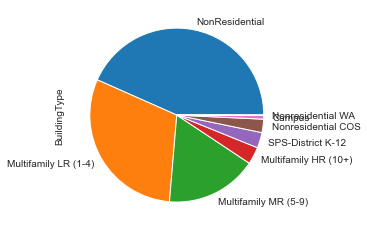

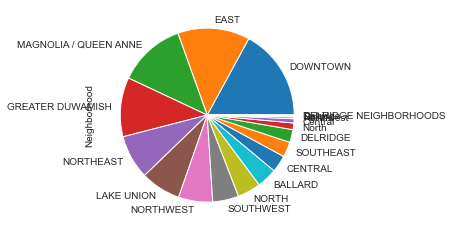

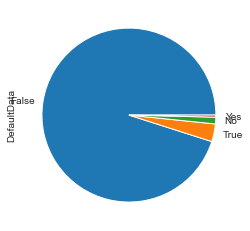

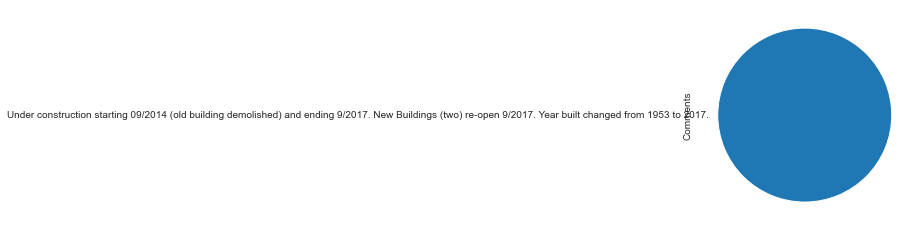

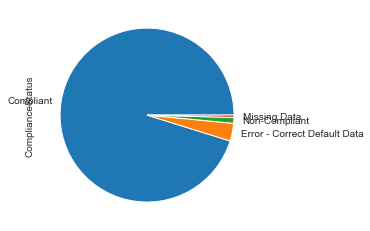

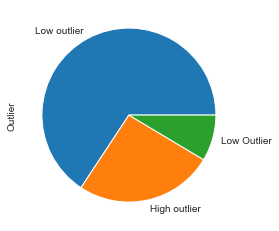

In [35]:
# Listes des variables catégorielles avec le nombre de catégories pour chacune
for col in df.select_dtypes('object'):
    print(col,len(df[col].value_counts()))
    
    # Représentation en pie chart des variables catégorielles avec moins de 25 catégories
    if len(df[col].value_counts()) < 25 : 
        plt.figure()
        df[col].value_counts().plot.pie()

#### b. Variables numériques

In [36]:
# Listes des variables numériques
for col in df.select_dtypes('number'):
    print(col)

DataYear
CouncilDistrictCode
YearBuilt
NumberofBuildings
NumberofFloors
PropertyGFATotal
PropertyGFAParking
PropertyGFABuilding(s)
LargestPropertyUseTypeGFA
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseTypeGFA
ENERGYSTARScore
SiteEUI(kBtu/sf)
SiteEUIWN(kBtu/sf)
SourceEUI(kBtu/sf)
SourceEUIWN(kBtu/sf)
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
SteamUse(kBtu)
Electricity(kWh)
Electricity(kBtu)
NaturalGas(therms)
NaturalGas(kBtu)
TotalGHGEmissions
GHGEmissionsIntensity
Longitude
Latitude
ZipCode


## 3. Aperçus des distributions avant nettoyage

### 3.1. Colonnes TotalGHGEmissions et SiteEnergyUse

Ces 2 colonnes sont les targets de notre étude.

In [37]:
df1 = df.copy()

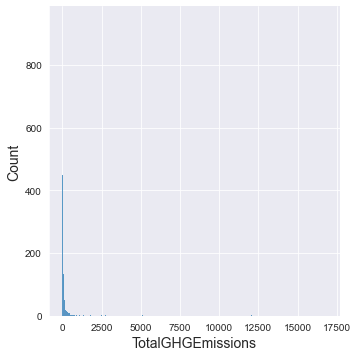

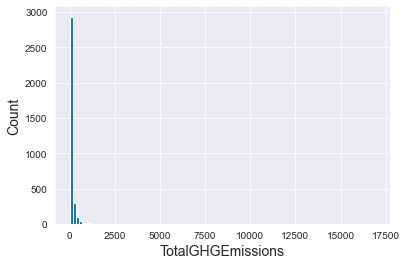

In [38]:
# Visualisation de la distribution de TotalGHGEmissions sous forme de displot et histogramme 
sns.displot(data = df1, x='TotalGHGEmissions')
plt.xlabel('TotalGHGEmissions',size = 14)
plt.ylabel('Count',size = 14)
plt.show()
plt.hist(df1['TotalGHGEmissions'], bins = 100)
plt.xlabel('TotalGHGEmissions',size = 14)
plt.ylabel('Count',size = 14)
plt.show()

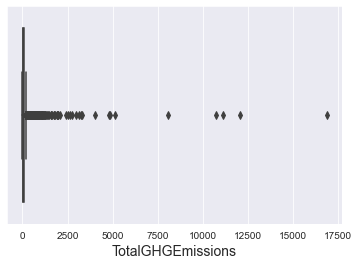

In [39]:
# Visualisation de la distribution de TotalGHGEmissions sous forme de boxplot
sns.boxplot(data = df1, x='TotalGHGEmissions', orient='h')
plt.xlabel('TotalGHGEmissions',size = 14)
plt.show()

Il semble y avoir des outliers vu la forme de la distribution. Par ailleurs, il est difficile de voir la forme de la distribution.

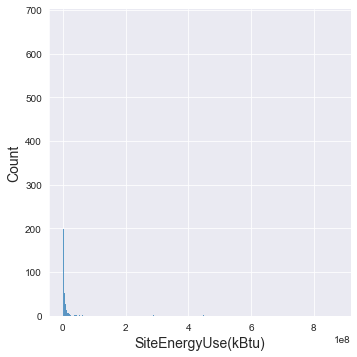

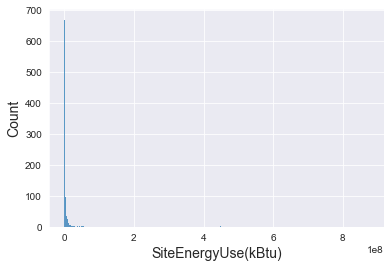

In [40]:
# Visualisation de la distribution de SiteEnergyUse(kBtu) sous forme de displot et histogramme 
sns.displot(df1['SiteEnergyUse(kBtu)'])
plt.xlabel('SiteEnergyUse(kBtu)',size = 14)
plt.ylabel('Count',size = 14)
plt.show()
sns.histplot(df1['SiteEnergyUse(kBtu)'])
plt.xlabel('SiteEnergyUse(kBtu)',size = 14)
plt.ylabel('Count',size = 14)
plt.show()

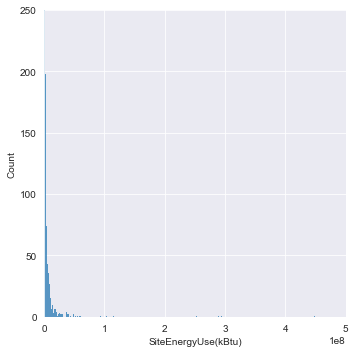

In [41]:
# Visualisation de la distribution de SiteEnergyUse(kBtu) sous forme de displot en zoomant un peu
sns.displot(df1['SiteEnergyUse(kBtu)'])
plt.xlim([0,5e8])
plt.ylim([0,250])
plt.show()

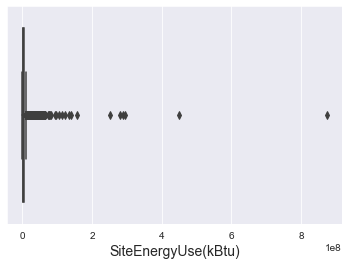

In [42]:
# Visualisation de la distribution de SiteEnergyUse(kBtu) sous forme de boxplot
sns.boxplot(data = df1, x='SiteEnergyUse(kBtu)', orient='h')
plt.xlabel('SiteEnergyUse(kBtu)',size = 14)
plt.show()

La présence d'outliers rend les distributions non symétriques. 

Comme on a des valeurs assez élevées pour les targets, on va prendre leur logarithme pour "abaisser" ces valeurs.

#### Passage au logarithme pour les targets

In [43]:
# Information sur les valeurs prises de TotalGHGEmissions
df1['TotalGHGEmissions'].describe()

count     3428.000000
mean       119.311982
std        534.287074
min          0.090000
25%          9.568750
50%         33.842500
75%         91.890000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

Comme il y a des valeurs très proches de 0 et que le log n'est pas défini en 0, on rajoute 1 à chaque valeur pour avoir des valeurs positives (par sécurité).

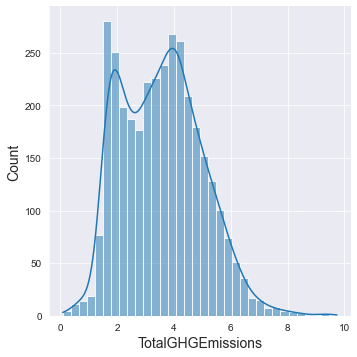

In [44]:
# Visualisation de la distribution de TotalGHGEmissions sous forme de displot en appliquant le logarithme 
sns.displot(df1['TotalGHGEmissions'].apply(lambda x : np.log(1 + x)), kde=True)
plt.xlabel('TotalGHGEmissions',size = 14)
plt.ylabel('Count',size = 14)
plt.show()

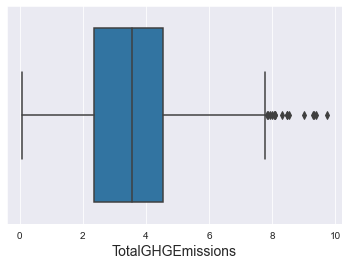

In [45]:
# Visualisation de la distribution de TotalGHGEmissions sous forme de boxplot en appliquant le logarithme 
sns.boxplot(df1['TotalGHGEmissions'].apply(lambda x : np.log(1 + x)), orient='h')
plt.xlabel('TotalGHGEmissions',size = 14)
plt.show()

On a un meilleur aperçu de la distribution. La distribution est mieux répartie, même si on note toujours la présence d'outliers.

In [46]:
# Information sur les valeurs prises de SiteEnergyUse(kBtu)
df1['SiteEnergyUse(kBtu)'].describe()

count    3.429000e+03
mean     5.398222e+06
std      2.152855e+07
min      0.000000e+00
25%      9.293272e+05
50%      1.792235e+06
75%      4.195498e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

On trouve des valeurs nulles donc on va passer au log (x+1).

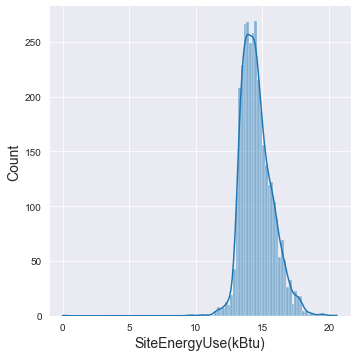

In [47]:
# Visualisation de la distribution de SiteEnergyUse(kBtu) sous forme de displot en appliquant le logarithme
sns.displot(df1['SiteEnergyUse(kBtu)'].apply(lambda x : np.log(1 + x)), kde=True)
plt.xlabel('SiteEnergyUse(kBtu)',size = 14)
plt.ylabel('Count',size = 14)
plt.show()

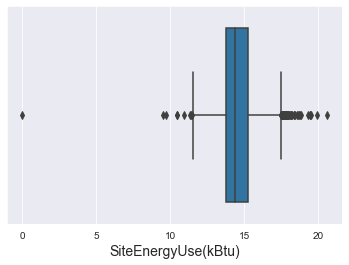

In [48]:
# Visualisation de la distribution de SiteEnergyUse(kBtu) sous forme de boxplot en appliquant le logarithme
sns.boxplot(df1['SiteEnergyUse(kBtu)'].apply(lambda x : np.log(1 + x)))
plt.xlabel('SiteEnergyUse(kBtu)',size = 14)
plt.show()

Présence d'un outlier à 0, s'agit il d'un bâtiment écologique ou d'une valeur aberrante ?

In [49]:
df1.loc[df1['SiteEnergyUse(kBtu)']==0]

DataYear  CouncilDistrictCode  YearBuilt  NumberofBuildings  \
OSEBuildingID                                                                
87               2015.5                  1.0     1948.0                1.0   

               NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
OSEBuildingID                                                         
87                        2.0           53352.0                 0.0   

               PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
OSEBuildingID                                                      
87                            53352.0                    59460.0   

               SecondLargestPropertyUseTypeGFA  \
OSEBuildingID                                    
87                                         NaN   

               ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  \
OSEBuildingID                                                    
87                                        NaN              NaN   

               SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
OSEBuildingID                                                             
87                          0.0                 0.0                 0.0   

               SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
OSEBuildingID                                              
87                              0.0                  0.0   

               SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
OSEBuildingID                                                            
87                               0.0             0.0       176088.0938   

               Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
OSEBuildingID                                                            
87                      600813.0                 0.0               0.0   

               TotalGHGEmissions  GHGEmissionsIntensity   Longitude  \
OSEBuildingID                                                         
87                          4.19                   0.08 -122.377906   

                Latitude  ZipCode       BuildingType PrimaryPropertyType  \
OSEBuildingID                                                              
87             47.509527  98146.0  SPS-District K-12         K-12 School   

                           PropertyName TaxParcelIdentificationNumber  \
OSEBuildingID                                                           
87             Arbor Heights Elementary                    2518400005   

              Neighborhood ListOfAllPropertyUseTypes LargestPropertyUseType  \
OSEBuildingID                                                                 
87               SOUTHWEST               K-12 School            K-12 School   

              SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
OSEBuildingID                                                            
87                                     NaN                         NaN   

              YearsENERGYSTARCertified DefaultData Comments ComplianceStatus  \
OSEBuildingID                                                                  
87                                 NaN       False      NaN     Missing Data   

              Outlier  
OSEBuildingID          
87                NaN

Il s'agit d'une école dont la colonne ComplianceStatus indique Missing Data => donc certainement à ne pas garder pour la suite.

### 3.2. Variables numériques

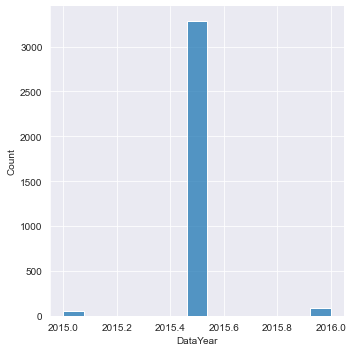

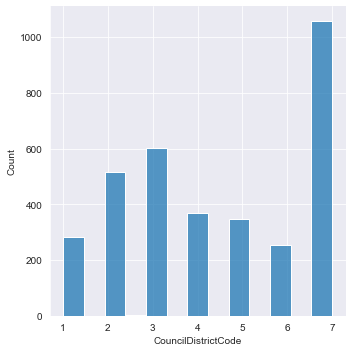

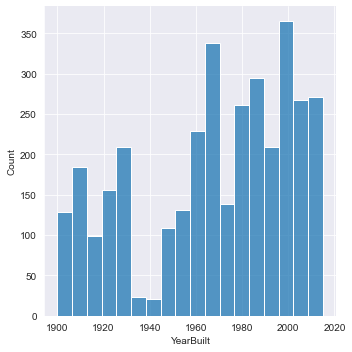

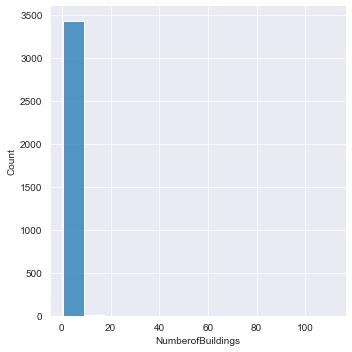

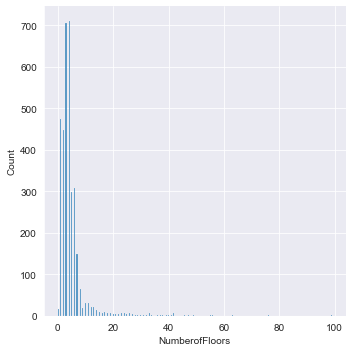

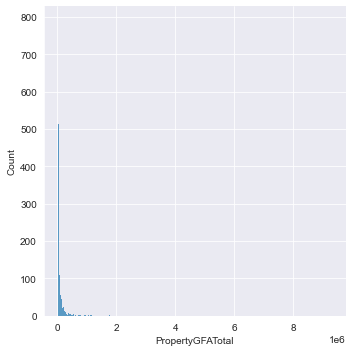

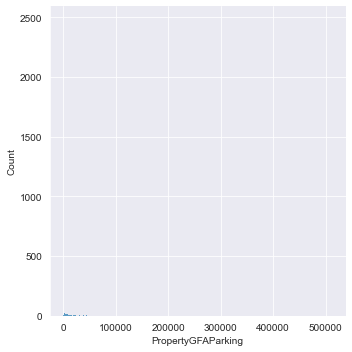

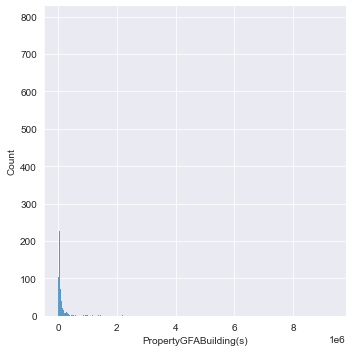

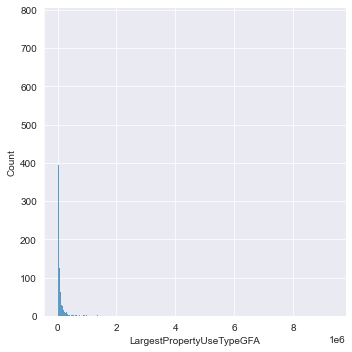

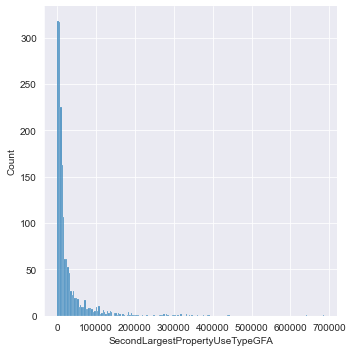

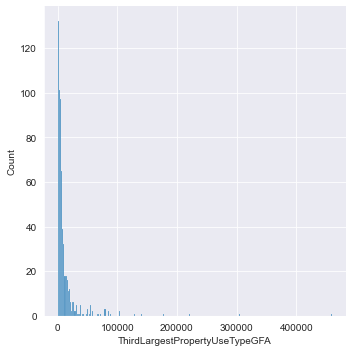

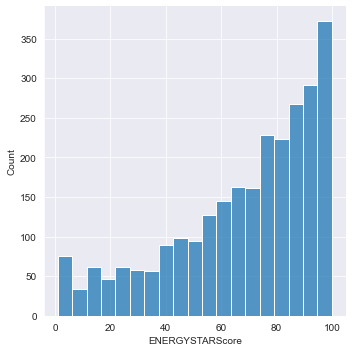

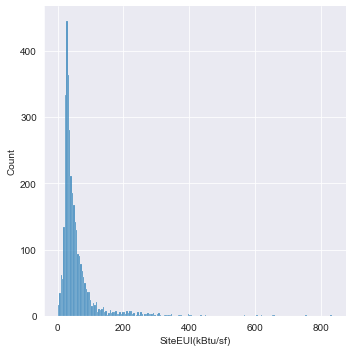

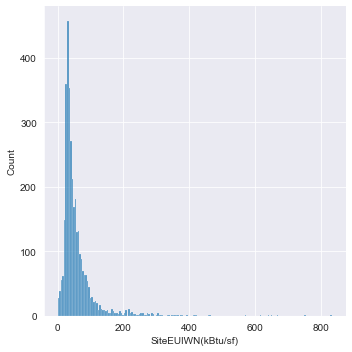

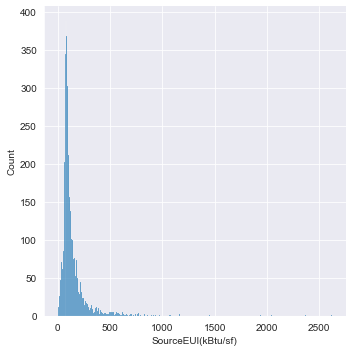

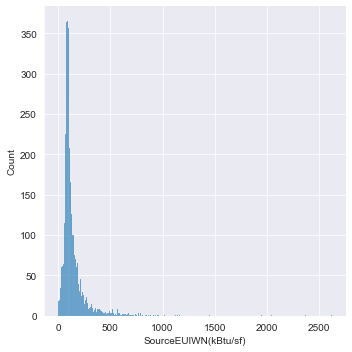

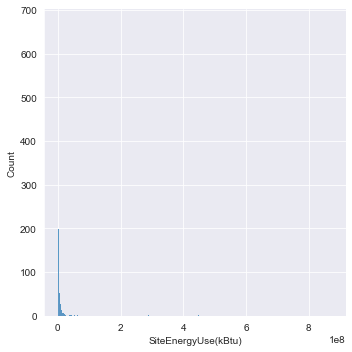

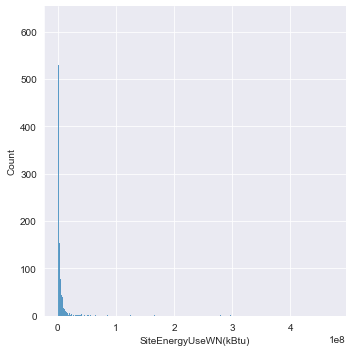

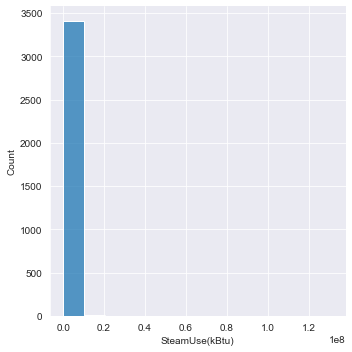

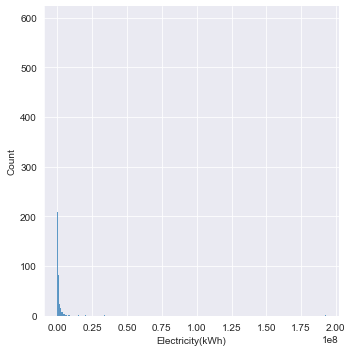

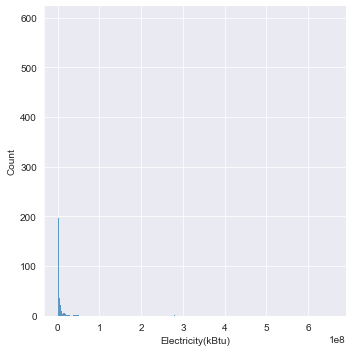

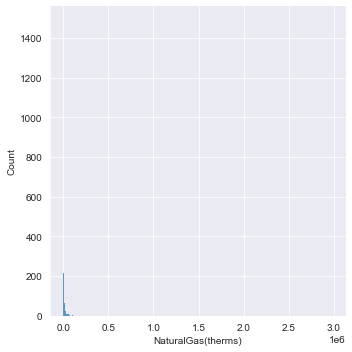

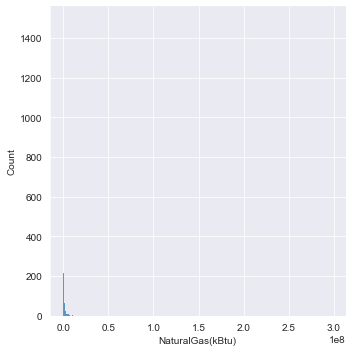

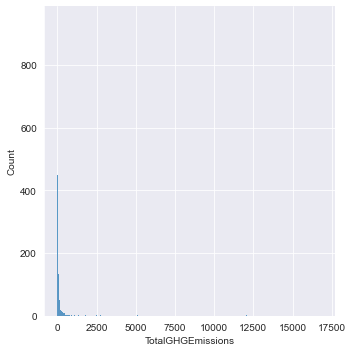

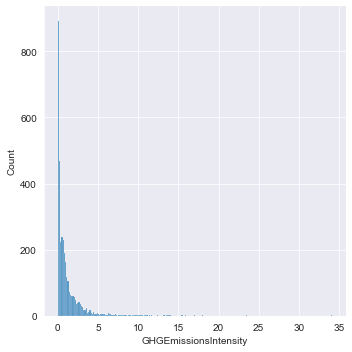

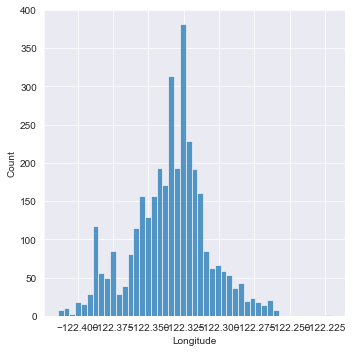

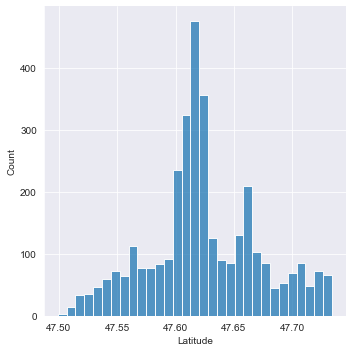

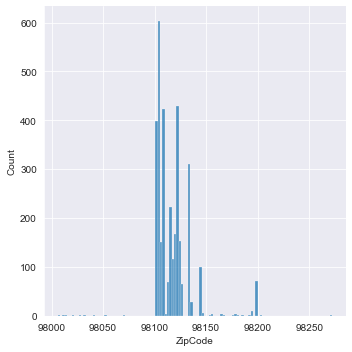

In [50]:
# Représentation sous forme d'histogramme
for col in df1.select_dtypes('number'):
    sns.displot(df1[col])

Les données ne sont pas standardisées car elles ne sont pas centrées sur 0. La distribution est le plus souvent asymétrique.

Elles ont des échelles différentes, donc il faudra les normaliser.

### 3.3. Variables Qualitatives

In [51]:
# Affichage des différentes catégories pour chaque colonne object
for col in df1.select_dtypes('object'):
    print(f'{col :*<50} {df1[col].unique()}')

BuildingType************************************** ['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']
PrimaryPropertyType******************************* ['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Low-Rise Multifamily' 'Senior Care Community'
 'Medical Office' 'Retail Store' 'Hospital' 'Residence Hall'
 'Distribution Center' 'Worship Facility' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Non-Refrigerated Warehouse'
 'High-Rise Multifamily' 'Restaurant' 'Restaurant\n' 'Office']
PropertyName************************************** ['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']
TaxParcelIdentificationNumber********************* [

Ce sont majoritairement des variables multiclasses, pas de variables binaires.

On voit qu'il y a beaucoup de catégories différentes pour ListOfAllPropertyUseTypes. Il semble plus pertinent de garder PrimaryPropertyType ou LargestPropertyUseType, à voir ce qu'on fait de SecondLargestPropertyUseType et ThirdLargestPropertyUseType.

On remarque que certaines valeurs de variables sont écrites 2 façons différentes (majuscules/miniscules) => à uniformiser.

On voit que PropertyName et TaxParcelIdentificationNumber sont spécifiques à chaque batiment, donc on ne va pas garder ces variables.

(Information sur la variable ComplianceStatus
ComplianceStatus = Whether a property has met energy benchmarking requirements for the current reporting year (=Si une propriété a satisfait aux exigences d'analyse comparative énergétique pour l'année de déclaration en cours)).

## 4. Nettoyage

### 4.1. Affichage des valeurs manquantes

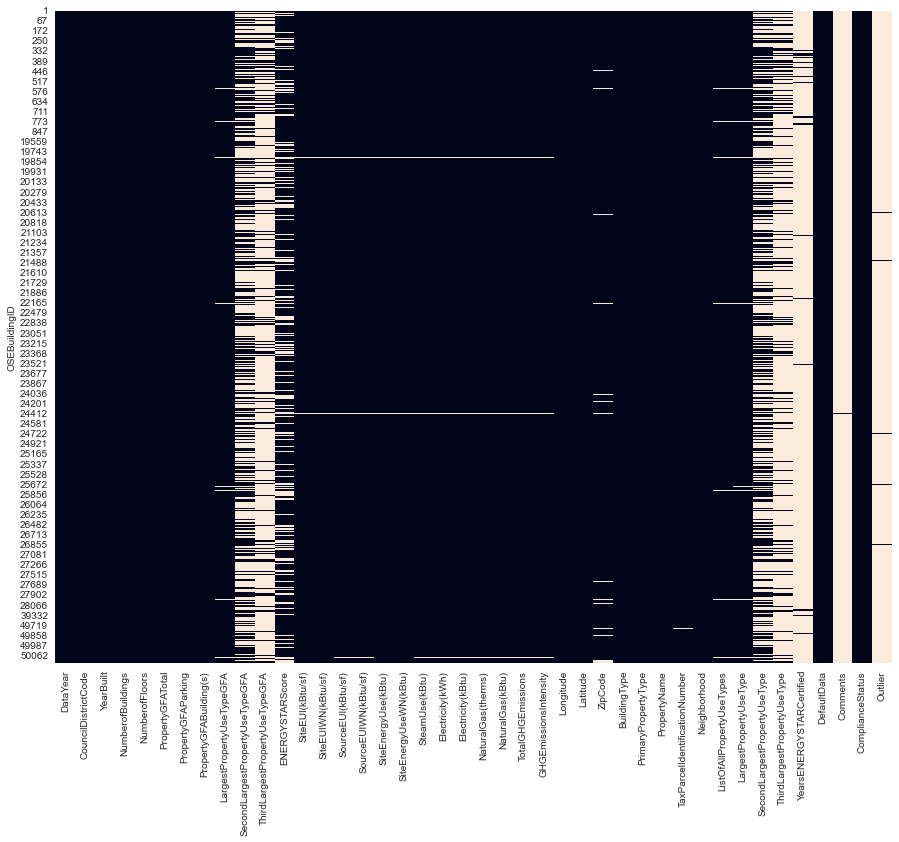

In [52]:
# Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df1.isna(), cbar = False)
plt.show()

In [53]:
perc_missing(df1)

Comments                           99.970862
Outlier                            98.980186
YearsENERGYSTARCertified           96.503497
ThirdLargestPropertyUseType        82.459207
ThirdLargestPropertyUseTypeGFA     82.313520
SecondLargestPropertyUseType       50.524476
SecondLargestPropertyUseTypeGFA    50.349650
ENERGYSTARScore                    22.610723
ZipCode                             2.097902
LargestPropertyUseType              1.048951
LargestPropertyUseTypeGFA           0.874126
ListOfAllPropertyUseTypes           0.728438
SteamUse(kBtu)                      0.116550
GHGEmissionsIntensity               0.116550
TotalGHGEmissions                   0.116550
NaturalGas(kBtu)                    0.116550
Electricity(kBtu)                   0.116550
Electricity(kWh)                    0.116550
NaturalGas(therms)                  0.116550
SourceEUIWN(kBtu/sf)                0.116550
SourceEUI(kBtu/sf)                  0.116550
SiteEnergyUseWN(kBtu)               0.087413
SiteEUIWN(

Il y a pas mal de données manquantes pour SecondLargestPropertyUseType/GFA et ThirdLargestPropertyUseType/GFA.

### 4.2. Filtrages 

#### Sur BuildingType

Conformément à l'énoncé du projet, on ne va travailler qu'avec les bâtiments non destinés à l'habitation.

On va donc faire un filtre sur BuildingType en éliminant les catégories avec multi-family.

In [54]:
non_resid = ['NonResidential', 'SPS-District K-12','Nonresidential COS','Campus','Nonresidential WA']
df2 = df1[df1.BuildingType.isin(non_resid)]
df3 = df2.reset_index(drop=True)
df3.shape

(1698, 42)

In [55]:
df3

DataYear  CouncilDistrictCode  YearBuilt  NumberofBuildings  \
0       2015.5                  7.0     1927.0                1.0   
1       2015.5                  7.0     1996.0                1.0   
2       2015.5                  7.0     1969.0                1.0   
3       2015.5                  7.0     1926.0                1.0   
4       2015.5                  7.0     1980.0                1.0   
...        ...                  ...        ...                ...   
1693    2016.0                  2.0     1990.0                1.0   
1694    2016.0                  2.0     2004.0                1.0   
1695    2016.0                  7.0     1974.0                1.0   
1696    2016.0                  1.0     1989.0                1.0   
1697    2016.0                  2.0     1938.0                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0               12.0           88434.0                 0.0   
1               11.0          103566.0             15064.0   
2               41.0          959050.0             98359.0   
3               10.0           61320.0                 0.0   
4               18.0          147735.0             37230.0   
...              ...               ...                 ...   
1693             1.0           12294.0                 0.0   
1694             1.0           16000.0                 0.0   
1695             1.0           13157.0                 0.0   
1696             1.0           14101.0                 0.0   
1697             1.0           18258.0                 0.0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                    88434.0                    88434.0   
1                    88502.0                    83880.0   
2                   860691.0                   756868.0   
3                    61320.0                    61320.0   
4                   110505.0                   123445.0   
...                      ...                        ...   
1693                 12294.0                    12294.0   
1694                 16000.0                    16000.0   
1695                 13157.0                     7583.0   
1696                 14101.0                     6601.0   
1697                 18258.0                     8271.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                                 NaN                             NaN   
1                             15064.0                          4622.0   
2                            100000.0                             0.0   
3                                 NaN                             NaN   
4                             68009.0                             0.0   
...                               ...                             ...   
1693                              NaN                             NaN   
1694                              NaN                             NaN   
1695                           5574.0                             0.0   
1696                           6501.0                           484.0   
1697                           8000.0                          1108.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
0                62.5         80.299998           82.300002   
1                56.0         94.600002           98.450001   
2                30.5         96.300000           98.699998   
3                28.5        285.600002          287.900002   
4                71.0        117.450002          120.399998   
...               ...               ...                 ...   
1693             46.0         69.099998           76.699997   
1694              NaN         59.400002           65.900002   
1695              NaN        438.200012          460.100006   
1696              NaN         51.000000           55.500000   
1697              NaN         63.099998           70.900002   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
0             178.

On a supprimé 51% du dataframe.

#### Sur ComplianceStatus

On va également garder que les bâtiments avec ComplianceStatus = Compliant pour avoir des données de meilleure qualité.

In [56]:
df3 = df3.loc[df3['ComplianceStatus']=='Compliant']
df3 = df3.reset_index(drop=True)
df3.shape

(1578, 42)

On garde pour l'instant 46% du dataset initial.

In [57]:
perc_missing(df3)

Comments                           99.936629
Outlier                            99.873257
YearsENERGYSTARCertified           93.789607
ThirdLargestPropertyUseType        77.756654
ThirdLargestPropertyUseTypeGFA     77.439797
SecondLargestPropertyUseType       45.944233
SecondLargestPropertyUseTypeGFA    45.817490
ENERGYSTARScore                    33.903676
ZipCode                             2.724968
LargestPropertyUseTypeGFA           0.633714
LargestPropertyUseType              0.633714
ListOfAllPropertyUseTypes           0.380228
SteamUse(kBtu)                      0.063371
GHGEmissionsIntensity               0.063371
TotalGHGEmissions                   0.063371
NaturalGas(kBtu)                    0.063371
Electricity(kBtu)                   0.063371
Electricity(kWh)                    0.063371
NaturalGas(therms)                  0.063371
SiteEnergyUseWN(kBtu)               0.063371
SourceEUIWN(kBtu/sf)                0.063371
SourceEUI(kBtu/sf)                  0.063371
SiteEUIWN(

On a encore pas mal de valeurs manquantes.

#### Vérification des filtrages

In [58]:
# fonction pour afficher la taille de chaque catégorie pour une colonne donnée
# prend en paramètres la colonne col et le dataframe df
def cat(col,df) :
    print(col)
    print('Nombre de catégories : ',len(df[col].value_counts()))
    return df[col].value_counts()

In [59]:
# liste des variables catégorielles
col_cat =['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType',
          'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType','ComplianceStatus']

In [60]:
# affichage de la taille de chaque catégorie pour les variables catégorielles
for col in col_cat :
    print(cat(col,df3))
    print('\n')

BuildingType
Nombre de catégories :  5
NonResidential        1460
Nonresidential COS      81
Campus                  25
SPS-District K-12       11
Nonresidential WA        1
Name: BuildingType, dtype: int64


PrimaryPropertyType
Nombre de catégories :  23
Small- and Mid-Sized Office    293
Other                          252
Warehouse                      185
Large Office                   172
Mixed Use Property             114
Retail Store                    88
Hotel                           75
Worship Facility                70
Distribution Center             53
K-12 School                     52
Medical Office                  42
Supermarket / Grocery Store     40
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Non-Refrigerated Warehouse       2
Low-Rise 

On a encore 2 lignes dont la PrimaryPropertyType est Low-Rise Multifamily. On va regarder à quoi cela correspond.

In [61]:
df3.loc[df3['PrimaryPropertyType']=='Low-Rise Multifamily']

DataYear  CouncilDistrictCode  YearBuilt  NumberofBuildings  \
585    2015.5                  4.0     2000.0                1.0   
856    2015.5                  7.0     1942.0                1.0   

     NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
585             3.0           93079.0             36093.0   
856             4.0           45500.0                 0.0   

     PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
585                 56986.0                    91064.0   
856                 45500.0                    22669.0   

     SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
585                              NaN                             NaN   
856                          10455.0                          3668.0   

     ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
585             63.0         25.050000           25.600000   
856              NaN         86.149998           86.149998   

     SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
585           75.899999             76.899999           1803469.25   
856          270.550000            270.550000           3821063.50   

     SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
585           1.849884e+06             0.0      4.914943e+05   
856           3.821064e+06             0.0      1.119890e+06   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
585          1677011.0         1264.909912          126491.0   
856          3821144.0            0.000000               0.0   

     TotalGHGEmissions  GHGEmissionsIntensity   Longitude   Latitude  ZipCode  \
585              18.41                  0.165 -122.333169  47.648692  98103.0   
856              26.64                  0.405 -122.340800  47.609199  98101.0   

       BuildingType   PrimaryPropertyType     PropertyName  \
585  NonResidential  Low-Rise Multifamily   Pacific Pointe   
856          Campus  Low-Rise Multifamily  Sanitary Market   

    TaxParcelIdentificationNumber Neighborhood  \
585                    0354000254   LAKE UNION   
856                    1976200210     DOWNTOWN   

                             ListOfAllPropertyUseTypes LargestPropertyUseType  \
585                                Multifamily Housing    Multifamily Housing   
856  Bar/Nightclub, Food Sales, Multifamily Housing...    Multifamily Housing   

    SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
585                          NaN                         NaN   
856                 Retail Store                  Restaurant   

    YearsENERGYSTARCertified DefaultData Comments ComplianceStatus Outlier  
585                      NaN       False      NaN        Compliant     NaN  
856                      NaN       False      NaN        Compliant     NaN

On va supprimer ces données.

On a aussi des batiments où LargestPropertyUseType = Multifamily Housing.

In [62]:
df3.loc[df3['LargestPropertyUseType']=='Multifamily Housing']

DataYear  CouncilDistrictCode  YearBuilt  NumberofBuildings  \
128     2015.5                  7.0     2002.0                1.0   
585     2015.5                  4.0     2000.0                1.0   
772     2015.5                  6.0     2001.0                3.0   
856     2015.5                  7.0     1942.0                1.0   
1032    2015.5                  7.0     1913.0                1.0   
1245    2015.5                  7.0     2009.0                1.0   
1265    2015.5                  4.0     1997.0                1.0   
1374    2015.5                  2.0     1909.0                1.0   
1441    2015.5                  3.0     1998.0                1.0   
1452    2015.5                  3.0     2004.0                1.0   
1465    2015.5                  2.5     1900.0                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
128              4.0          110785.0             19589.5   
585              3.0           93079.0             36093.0   
772              3.0           41827.0              9226.0   
856              4.0           45500.0                 0.0   
1032             3.0           43878.0                 0.0   
1245            39.0         1074552.0            112124.0   
1265             4.0           32282.0              6985.0   
1374             3.0           20620.0                 0.0   
1441             5.0           53034.0             14625.0   
1452             6.0           97229.0             17486.5   
1465             3.0           22168.0                 0.0   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
128                  91195.5                    58563.0   
585                  56986.0                    91064.0   
772                  32601.0                    14273.0   
856                  45500.0                    22669.0   
1032                 43878.0                    12000.0   
1245                962428.0                   311521.0   
1265                 25297.0                    12600.0   
1374                 20620.0                    10060.0   
1441                 38409.0                    22486.0   
1452                 79742.5                    45300.0   
1465                 22168.0                    11084.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
128                           48520.0                         29839.0   
585                               NaN                             NaN   
772                           14128.0                          9680.0   
856                           10455.0                          3668.0   
1032                           8262.0                          6312.0   
1245                         303000.0                        141450.0   
1265                           6985.0                          6576.0   
1374                           5280.0                          5280.0   
1441                          14257.0                         13308.0   
1452                          35973.0                         16956.0   
1465                          11084.0                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
128               NaN         95.550002           98.749999   
585              63.0         25.050000           25.600000   
772               NaN        100.950002          103.200000   
856               NaN         86.149998           86.149998   
1032              NaN         22.950000           22.900000   
1245             63.5         43.700000           44.600000   
1265              NaN         56.100000           61.750000   
1374              NaN         41.100000           45.200001   
1441             93.5         91.050002           95.499998   
1452            100.0         15.950000           16.650000   
1465              NaN         78.350000           85.500001   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
128           292.

11 lignes dont LargestPropertyUseType est Multifamily Housing. On va également les supprimer. 

In [63]:
df4 = df3.drop(df3.loc[df3['LargestPropertyUseType']=='Multifamily Housing'].index)
df4 = df4.reset_index(drop=True)
df4.shape

(1567, 42)

### 4.3. Uniformisation d'écriture
On remarque que pour Neighborhood, on a certaines catégories écrites en miniscules et majuscules.

On va mettre tous les Neighborhood en majuscules et on remplace DELRIDGE NEIGHBORHOODS par DELRIDGE 

In [64]:
df4['Neighborhood'] = df4['Neighborhood'].str.upper()
df4['Neighborhood'] = df4['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS','DELRIDGE')
df4['Neighborhood'].value_counts()

DOWNTOWN                 356
GREATER DUWAMISH         331
MAGNOLIA / QUEEN ANNE    147
LAKE UNION               144
EAST                     118
NORTHEAST                116
NORTHWEST                 81
BALLARD                   65
NORTH                     59
CENTRAL                   45
DELRIDGE                  41
SOUTHEAST                 33
SOUTHWEST                 31
Name: Neighborhood, dtype: int64

In [65]:
# Changement de la valeur 'Restaurant\n' en 'Restaurant'
df4.loc[df4['PrimaryPropertyType'] == 'Restaurant\n', 'PrimaryPropertyType'] = 'Restaurant'

In [66]:
df4['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    293
Other                          252
Warehouse                      185
Large Office                   172
Mixed Use Property             105
Retail Store                    88
Hotel                           75
Worship Facility                70
Distribution Center             53
K-12 School                     52
Medical Office                  42
Supermarket / Grocery Store     40
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Restaurant                      13
Refrigerated Warehouse          12
Hospital                        10
Laboratory                      10
Non-Refrigerated Warehouse       2
Name: PrimaryPropertyType, dtype: int64

### 4.4. Vérification de la distribution des targets

On va regarder comment sont les targets dans ce nouveau dataframe.

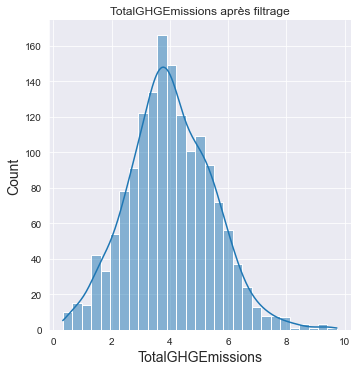

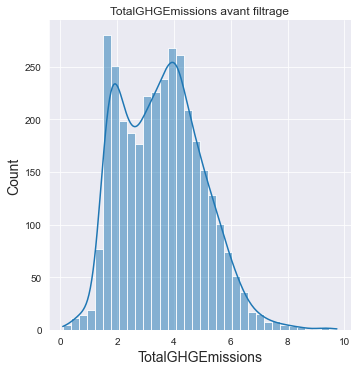

In [67]:
# Affichage de la distribution de TotalGHGEmissions après/avant filtrage sous forme de displot
sns.displot(df4['TotalGHGEmissions'].apply(lambda x : np.log(1 + x)), kde=True)
plt.xlabel('TotalGHGEmissions',size = 14)
plt.ylabel('Count',size = 14)
plt.title('TotalGHGEmissions après filtrage')
plt.show()

sns.displot(df['TotalGHGEmissions'].apply(lambda x : np.log(1 + x)), kde=True)
plt.xlabel('TotalGHGEmissions',size = 14)
plt.ylabel('Count',size = 14)
plt.title('TotalGHGEmissions avant filtrage')
plt.show()

La distribution est plus de type gaussienne qu'avant.

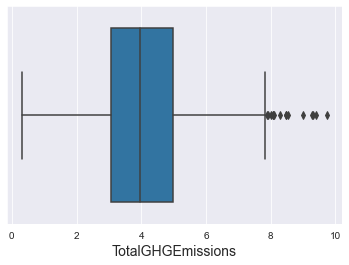

In [68]:
# Affichage de la distribution de TotalGHGEmissions après filtrage sous forme de boxplot
sns.boxplot(df4['TotalGHGEmissions'].apply(lambda x : np.log(1 + x)))
plt.xlabel('TotalGHGEmissions',size = 14)
plt.show()

Présence d'outliers que d'un côté.

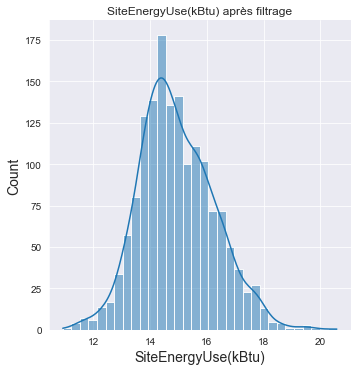

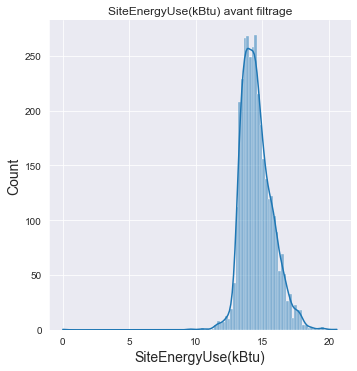

In [69]:
# Affichage de la distribution de SiteEnergyUse(kBtu) après/avant filtrage sous forme de displot
sns.displot(df4['SiteEnergyUse(kBtu)'].apply(lambda x : np.log(1 + x)), kde=True)
plt.title('SiteEnergyUse(kBtu) après filtrage')
plt.xlabel('SiteEnergyUse(kBtu)',size = 14)
plt.ylabel('Count',size = 14)
plt.show()

sns.displot(df['SiteEnergyUse(kBtu)'].apply(lambda x : np.log(1 + x)), kde=True)
plt.title('SiteEnergyUse(kBtu) avant filtrage')
plt.xlabel('SiteEnergyUse(kBtu)',size = 14)
plt.ylabel('Count',size = 14)
plt.show()

Avec ce filtrage, on a gardé l'allure générale en éliminant les valeurs basses.

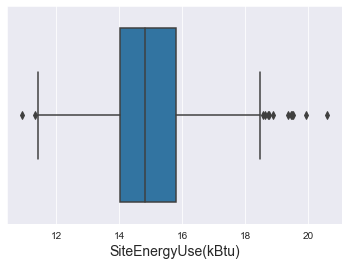

In [70]:
# Affichage de la distribution de SiteEnergyUse(kBtu) après filtrage sous forme de boxplot
sns.boxplot(df4['SiteEnergyUse(kBtu)'].apply(lambda x : np.log(1 + x)))
plt.xlabel('SiteEnergyUse(kBtu)',size = 14)
plt.show()

Présence d'outliers de part et d'autre du box-plot.

### 4.5. Suppression des colonnes non pertinentes

#### Avec trop de valeurs manquantes

In [71]:
perc_missing(df4)

Comments                           99.936184
Outlier                            99.872368
YearsENERGYSTARCertified           93.746011
ThirdLargestPropertyUseType        78.174856
ThirdLargestPropertyUseTypeGFA     77.855775
SecondLargestPropertyUseType       46.202936
SecondLargestPropertyUseTypeGFA    46.075303
ENERGYSTARScore                    33.694959
ZipCode                             2.744097
LargestPropertyUseTypeGFA           0.638162
LargestPropertyUseType              0.638162
ListOfAllPropertyUseTypes           0.382897
SteamUse(kBtu)                      0.063816
GHGEmissionsIntensity               0.063816
TotalGHGEmissions                   0.063816
NaturalGas(kBtu)                    0.063816
Electricity(kBtu)                   0.063816
Electricity(kWh)                    0.063816
NaturalGas(therms)                  0.063816
SiteEnergyUseWN(kBtu)               0.063816
SourceEUIWN(kBtu/sf)                0.063816
SourceEUI(kBtu/sf)                  0.063816
SiteEUIWN(

In [72]:
# Suppression des colonnes avec plus de 93% de valeurs manquantes
df5 = df4[df4.columns[df4.isna().sum()/df4.shape[0] < 0.93]]
df5.shape

(1567, 39)

In [73]:
perc_missing(df5)

ThirdLargestPropertyUseType        78.174856
ThirdLargestPropertyUseTypeGFA     77.855775
SecondLargestPropertyUseType       46.202936
SecondLargestPropertyUseTypeGFA    46.075303
ENERGYSTARScore                    33.694959
ZipCode                             2.744097
LargestPropertyUseType              0.638162
LargestPropertyUseTypeGFA           0.638162
ListOfAllPropertyUseTypes           0.382897
SiteEnergyUseWN(kBtu)               0.063816
GHGEmissionsIntensity               0.063816
TotalGHGEmissions                   0.063816
NaturalGas(kBtu)                    0.063816
NaturalGas(therms)                  0.063816
Electricity(kBtu)                   0.063816
SteamUse(kBtu)                      0.063816
Electricity(kWh)                    0.063816
SiteEnergyUse(kBtu)                 0.063816
SourceEUIWN(kBtu/sf)                0.063816
SiteEUIWN(kBtu/sf)                  0.063816
SiteEUI(kBtu/sf)                    0.063816
SourceEUI(kBtu/sf)                  0.063816
TaxParcelI

#### Colonnes non pertinentes
On va supprimer les colonnes suivantes qui sont de la fuite de données dans le cadre du projet (par ailleurs, données non accessibles lors de la construction d'un bâtiment) :
SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu).

Ainsi que 
- DataYear
- le ZipCode
- GHGEmissionsIntensity, SiteEnergyUseWN(kBtu)
- TaxParcelIdentificationNumber et ListOfAllPropertyUseTypes qui prennent trop de valeurs différentes
- Longitude,Latitude moins parlants que Neighborhood d'un point de vue métier
- PropertyName spécifique à quasiment chaque bâtiment
- ComplianceStatus & DefaultData

On va transformer CouncilDistrictCode en string.

In [74]:
# liste des colonnes à supprimer
a_suppr = ['DataYear','TaxParcelIdentificationNumber','Longitude','Latitude','SiteEUI(kBtu/sf)', 
           'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 
           'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)','DefaultData',
           'GHGEmissionsIntensity','SiteEnergyUseWN(kBtu)','ComplianceStatus','ListOfAllPropertyUseTypes',
           'PropertyName','ZipCode' ]

df5 = df5.drop(a_suppr, axis = 1)
df5['CouncilDistrictCode'] = df5['CouncilDistrictCode'].apply(str)
df5.shape

(1567, 19)

In [75]:
perc_missing(df5)

ThirdLargestPropertyUseType        78.174856
ThirdLargestPropertyUseTypeGFA     77.855775
SecondLargestPropertyUseType       46.202936
SecondLargestPropertyUseTypeGFA    46.075303
ENERGYSTARScore                    33.694959
LargestPropertyUseType              0.638162
LargestPropertyUseTypeGFA           0.638162
TotalGHGEmissions                   0.063816
SiteEnergyUse(kBtu)                 0.063816
Neighborhood                        0.000000
PrimaryPropertyType                 0.000000
BuildingType                        0.000000
NumberofBuildings                   0.000000
NumberofFloors                      0.000000
YearBuilt                           0.000000
PropertyGFABuilding(s)              0.000000
PropertyGFAParking                  0.000000
PropertyGFATotal                    0.000000
CouncilDistrictCode                 0.000000
dtype: float64

### 4.6. Suppression des lignes avec peu de valeurs manquantes

On va supprimer les lignes où il y a des valeurs manquantes pour les colonnes LargestPropertyUseTypeGFA,           LargestPropertyUseType, SiteEnergyUse(kBtu) et TotalGHGEmissions (moins de 1% de valeurs manquantes).

In [76]:
df5.dropna(subset = ['LargestPropertyUseTypeGFA','LargestPropertyUseType','SiteEnergyUse(kBtu)',
                         'TotalGHGEmissions'], inplace = True)
df5 = df5.reset_index(drop=True)
perc_missing(df5)

ThirdLargestPropertyUseType        78.020566
ThirdLargestPropertyUseTypeGFA     77.699229
SecondLargestPropertyUseType       45.822622
SecondLargestPropertyUseTypeGFA    45.694087
ENERGYSTARScore                    33.547558
SiteEnergyUse(kBtu)                 0.000000
LargestPropertyUseType              0.000000
Neighborhood                        0.000000
PrimaryPropertyType                 0.000000
BuildingType                        0.000000
TotalGHGEmissions                   0.000000
NumberofBuildings                   0.000000
NumberofFloors                      0.000000
YearBuilt                           0.000000
LargestPropertyUseTypeGFA           0.000000
PropertyGFABuilding(s)              0.000000
PropertyGFAParking                  0.000000
PropertyGFATotal                    0.000000
CouncilDistrictCode                 0.000000
dtype: float64

In [77]:
df5.shape

(1556, 19)

### 4.7. Gestion des NaN des colonnes SecondLargestPropertyUseType/GFA 
### et ThirdLargestPropertyUseType/GFA

On va remplacer les NaN dans SecondLargestPropertyUseType/GFA et ThirdLargestPropertyUseType/GFA par None et 0, indiquant qu'il n'y a pas de seconde et/ou troisième utilisation.

In [78]:
# Valeurs manquantes remplacées par catégorie None
df5["SecondLargestPropertyUseType"].fillna('None', inplace=True)
df5["ThirdLargestPropertyUseType"].fillna('None', inplace=True)

# Valeurs manquantes remplacées par 0
df5["SecondLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
df5["ThirdLargestPropertyUseTypeGFA"].fillna(0, inplace=True)

In [79]:
perc_missing(df5)

ENERGYSTARScore                    33.547558
CouncilDistrictCode                 0.000000
SecondLargestPropertyUseType        0.000000
LargestPropertyUseType              0.000000
Neighborhood                        0.000000
PrimaryPropertyType                 0.000000
BuildingType                        0.000000
TotalGHGEmissions                   0.000000
SiteEnergyUse(kBtu)                 0.000000
ThirdLargestPropertyUseTypeGFA      0.000000
YearBuilt                           0.000000
SecondLargestPropertyUseTypeGFA     0.000000
LargestPropertyUseTypeGFA           0.000000
PropertyGFABuilding(s)              0.000000
PropertyGFAParking                  0.000000
PropertyGFATotal                    0.000000
NumberofFloors                      0.000000
NumberofBuildings                   0.000000
ThirdLargestPropertyUseType         0.000000
dtype: float64

### 4.8. Gestion des valeurs aberrantes

In [80]:
df5.describe()

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count  1556.000000        1556.000000     1556.000000      1.556000e+03   
mean   1961.474936           1.159383        4.244216      1.210191e+05   
std      32.890582           2.934546        6.714442      3.049308e+05   
min    1900.000000           0.500000        0.000000      1.128500e+04   
25%    1929.750000           1.000000        1.000000      2.880600e+04   
50%    1965.000000           1.000000        2.000000      4.812550e+04   
75%    1988.000000           1.000000        4.000000      1.079678e+05   
max    2015.000000         111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1556.000000            1.556000e+03               1.556000e+03   
mean         14452.490360            1.065666e+05               1.003737e+05   
std          44591.701711            2.899211e+05               2.853350e+05   
min             -1.000000           -8.451000e+03               6.455000e+03   
25%              0.000000            2.786650e+04               2.500000e+04   
50%              0.000000            4.616425e+04               4.192100e+04   
75%              0.000000            9.670900e+04               9.248000e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1556.000000                     1556.000000   
mean                      19817.596496                     3234.084383   
std                       51975.913515                    18196.314592   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       13879.500000                        0.000000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  
count      1034.000000         1.556000e+03        1556.000000  
mean         62.976306         8.914267e+06         195.095794  
std          28.402602         3.135084e+07         777.157719  
min           1.000000         5.526710e+04           0.385000  
25%          43.500000         1.239899e+06          20.642500  
50%          69.500000         2.681188e+06          51.295000  
75%          87.000000         7.328612e+06         146.401250  
max         100.000000         8.739237e+08       16870.980000

#### GFA
On voit que l'on a des valeurs négatives pour des surfaces !

In [81]:
df5.loc[df5['PropertyGFABuilding(s)']<=0]

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
1527                 4.0     2014.0                1.0             3.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1527           33648.0             42099.0                 -8451.0   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
1527                    83600.0                          39000.0   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
1527                             0.0              NaN         1.394567e+06   

      TotalGHGEmissions    BuildingType PrimaryPropertyType Neighborhood  \
1527              9.725  NonResidential               Other    NORTHEAST   

     LargestPropertyUseType SecondLargestPropertyUseType  \
1527                Parking        Automobile Dealership   

     ThirdLargestPropertyUseType  
1527                        None

In [82]:
df5.loc[df5['PropertyGFAParking']<0]

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
1446                 2.0     2000.0                1.0            11.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1446           68452.0                -1.0                 68453.0   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
1446                    61665.0                           6787.0   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
1446                             0.0             80.0          3726338.125   

      TotalGHGEmissions    BuildingType          PrimaryPropertyType  \
1446              25.98  NonResidential  Small- and Mid-Sized Office   

     Neighborhood LargestPropertyUseType SecondLargestPropertyUseType  \
1446     DOWNTOWN                 Office                  Bank Branch   

     ThirdLargestPropertyUseType  
1446                        None

On va supprimer ces lignes

In [83]:
df5.drop(df5.loc[df5['PropertyGFAParking'] <0].index, axis = 0, inplace = True)
df5.drop(df5.loc[df5['PropertyGFABuilding(s)'] <0].index, axis = 0, inplace = True)
df5 = df5.reset_index(drop=True)
df5.shape

(1554, 19)

On regarde si PropertyGFATotal = PropertyGFABuilding(s) + PropertyGFAParking

In [84]:
df5.loc[(df5['PropertyGFATotal'] != (df5['PropertyGFABuilding(s)'] +df5['PropertyGFAParking']))]

Empty DataFrame
Columns: [CouncilDistrictCode, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEnergyUse(kBtu), TotalGHGEmissions, BuildingType, PrimaryPropertyType, Neighborhood, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType]
Index: []

Donc PropertyGFATotal est bien répartie entre PropertyGFABuilding(s) et PropertyGFAParking

On regarde si PropertyGFATotal < LargestPropertyUseTypeGFA

In [85]:
df5.loc[(df5['PropertyGFATotal'] < (df5['LargestPropertyUseTypeGFA'] ))]

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
10                   7.0     1998.0                1.0            25.0   
30                   2.0     1992.0                1.0             3.0   
37                   7.0     1969.0                1.0            24.0   
53                   1.0     1922.0                1.0             5.0   
59                   7.0     1929.0                1.0             2.0   
...                  ...        ...                ...             ...   
1512                 3.0     1920.0                1.0             8.0   
1528                 7.0     2015.0                1.0            14.0   
1531                 2.0     2015.0                1.0             2.0   
1538                 3.0     2015.0                1.0             3.0   
1540                 4.0     1962.0                1.0             1.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
10            333176.0             61161.0                272015.0   
30            494835.0                 0.0                494835.0   
37            332210.0            205970.0                126240.0   
53            217603.0                 0.0                217603.0   
59             58320.0                 0.0                 58320.0   
...                ...                 ...                     ...   
1512          374466.0                 0.0                374466.0   
1528          144614.0                 0.0                144614.0   
1531          108036.0                 0.0                108036.0   
1538           45000.0                 0.0                 45000.0   
1540           68072.0                 0.0                 68072.0   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
10                     336640.0                              0.0   
30                     757027.0                         639931.0   
37                     348630.0                              0.0   
53                     296313.0                              0.0   
59                      72072.0                              0.0   
...                         ...                              ...   
1512                  1010135.0                              0.0   
1528                   159500.0                              0.0   
1531                   202171.0                         108036.0   
1538                    45728.0                              0.0   
1540                    68916.0                              0.0   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
10                               0.0             34.0         2.732907e+07   
30                          459748.0              8.0         4.483853e+08   
37                               0.0             67.5         1.591191e+07   
53                               0.0             52.0         4.414320e+07   
59                               0.0             95.5         1.061964e+06   
...                              ...              ...                  ...   
1512                             0.0             85.5         1.212990e+08   
1528                             0.0             89.0         5.525072e+06   
1531                             0.0              NaN         4.991894e+06   
1538                             0.0             77.0         1.325973e+06   
1540                             0.0              NaN         3.180819e+06   

      TotalGHGEmissions       BuildingType    PrimaryPropertyType  \
10              732.185     NonResidential                  Hotel   
30            16870.980             Campus     Mixed Use Property   
37              279.590     NonResidential                  Hotel   
53             1792.975     NonResidential  Senior Care Community   
59               39.375     NonResidential           Retail Store   
...                 ...                ...                    ...   
1512           5112.460     NonResiden

La colonne LargestPropertyUseTypeGFA n'est peut être pas pertinente à garder, à voir.

#### NumberofBuildings

In [86]:
# Valeurs prises
df5['NumberofBuildings'].value_counts()

1.0      1448
0.5        52
1.5        14
2.0        11
3.0         7
5.0         3
3.5         3
7.5         2
4.0         2
2.5         2
15.0        1
11.0        1
14.0        1
20.0        1
4.5         1
12.0        1
10.0        1
6.0         1
7.0         1
111.0       1
Name: NumberofBuildings, dtype: int64

On va modifier les valeurs prises par NumberofBuildings car il y a des valeurs demi-entières.

In [88]:
# Fonction pour arrondir à la valeur supérieure en cas de nb décimal
# prend en paramètre la valeur x

def arrondi(x):
    n = int(x)
    return n if n-1 < x <= n else n+1

In [89]:
df5['NumberofBuildings'] = df5['NumberofBuildings'].apply(lambda x : arrondi(x))  
df5['NumberofBuildings'].value_counts()

1      1500
2        25
3         9
4         5
5         4
8         2
14        1
11        1
15        1
20        1
12        1
10        1
6         1
7         1
111       1
Name: NumberofBuildings, dtype: int64

On va faire un export du dataframe ici, car pour la suite, on impute une valeur aberrante par une valeur qui dépend des données => cela peut influencer le testset. On fera l'imputation une fois le split trainset/testset fait.

In [90]:
df5.to_csv("data_for_ML2.csv")

On continue néanmoins avec nos données pour poursuivre l'analyse.

#### NumberofFloors

On va regarder quels batiments ont un NumberofFloors = 0

In [91]:
df5.loc[df5['NumberofFloors']==0]

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
128                  7.0     1999.0                  1             0.0   
430                  3.0     2004.0                  1             0.0   
431                  7.0     2006.0                  1             0.0   
503                  7.0     1999.0                  1             0.0   
1003                 3.0     1945.0                  1             0.0   
1084                 2.0     1991.0                 10             0.0   
1464                 4.0     1940.0                  1             0.0   
1465                 4.0     1960.0                  1             0.0   
1466                 4.0     1960.0                  1             0.0   
1479                 4.0     1929.0                  8             0.0   
1516                 2.0     2009.0                  1             0.0   
1517                 4.0     1900.0                111             0.0   
1519                 4.0     2011.0                  1             0.0   
1521                 4.0     1953.0                  1             0.0   
1522                 4.0     1970.0                  1             0.0   
1523                 4.0     2011.0                  1             0.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
128           934292.0                 0.0                934292.0   
430           225982.0                 0.0                225982.0   
431           516407.0                 0.0                516407.0   
503           947987.0            220092.5                727894.5   
1003          274568.0                 0.0                274568.0   
1084          205883.5                 0.0                205883.5   
1464          384772.0                 0.0                384772.0   
1465           30287.0                 0.0                 30287.0   
1466           21931.0                 0.0                 21931.0   
1479          502030.0                 0.0                502030.0   
1516           40265.0                 0.0                 40265.0   
1517         9320156.0                 0.0               9320156.0   
1519          176225.0                 0.0                176225.0   
1521          166991.0                 0.0                166991.0   
1522           89392.0                 0.0                 89392.0   
1523           97040.0                 0.0                 97040.0   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
128                    495536.0                         438756.0   
430                    200184.0                              0.0   
431                    385196.0                         340236.0   
503                    561684.0                         100000.0   
1003                   228133.0                         135954.0   
1084                   230970.0                              0.0   
1464                   349953.0                          63872.0   
1465                    29946.5                              0.0   
1466                    29922.5                          31845.0   
1479                   564258.0                              0.0   
1516                    40265.0                              0.0   
1517                  9320156.0                              0.0   
1519                   176225.0                          24000.0   
1521                   166991.0                              0.0   
1522                    89392.0                              0.0   
1523                    97040.0                              0.0   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
128                          49700.0              NaN         6.442916e+07   
430                              0.0             57.0         1.955939e+07   
431                          67627.0             25.0         4.419219e+07   
503                          80000.0              NaN         4.732709e+07   
1003    

Il s'agit de valeurs aberrantes (aux Etats-Unis, il y a toujours au moins l'étage 1 (= rez-de-chaussée français). On va remplacer par la valeur médiane selon le PrimaryPropertyType.

In [92]:
for cat in list(df5['PrimaryPropertyType'].unique()) :
    #print(cat)
    for val in df5['NumberofFloors'].loc[df5['PrimaryPropertyType']==cat] :
        if val ==0 :
                df5['NumberofFloors'].loc[
                    df5['PrimaryPropertyType']==cat] = df5['NumberofFloors'].loc[
                    df5['PrimaryPropertyType']==cat].replace(0,
                                                          int(df5['NumberofFloors'].loc[
                                                              df5['PrimaryPropertyType']==cat].median()))

In [93]:
df5.loc[df5['NumberofFloors']==0]

Empty DataFrame
Columns: [CouncilDistrictCode, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEnergyUse(kBtu), TotalGHGEmissions, BuildingType, PrimaryPropertyType, Neighborhood, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType]
Index: []

In [94]:
df5.describe()

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count  1554.000000        1554.000000     1554.000000      1.554000e+03   
mean   1961.416345           1.183398        4.268340      1.211092e+05   
std      32.870168           2.937943        6.705329      3.051161e+05   
min    1900.000000           1.000000        1.000000      1.128500e+04   
25%    1929.250000           1.000000        1.000000      2.880200e+04   
50%    1965.000000           1.000000        2.000000      4.812550e+04   
75%    1988.000000           1.000000        4.000000      1.080132e+05   
max    2015.000000         111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1554.000000            1.554000e+03               1.554000e+03   
mean         14444.000644            1.066652e+05               1.004094e+05   
std          44613.382038            2.900915e+05               2.855167e+05   
min              0.000000            5.352500e+03               6.455000e+03   
25%              0.000000            2.788400e+04               2.500000e+04   
50%              0.000000            4.616425e+04               4.188900e+04   
75%              0.000000            9.686700e+04               9.284000e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1554.000000                     1554.000000   
mean                      19813.637805                     3238.246653   
std                       52006.041617                    18207.657336   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       13854.500000                        0.000000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  
count      1033.000000         1.554000e+03        1554.000000  
mean         62.959826         8.922445e+06         195.323906  
std          28.411413         3.137016e+07         777.631880  
min           1.000000         5.526710e+04           0.385000  
25%          43.500000         1.239552e+06          20.680000  
50%          69.500000         2.681188e+06          51.407500  
75%          87.000000         7.338487e+06         146.583750  
max         100.000000         8.739237e+08       16870.980000

## 5. Analyse des données
### 5.1. Distribution des variables numériques

On va travailler avec le dataset où les targets sont passées au log.

In [95]:
df5_log = df5.copy()
df5_log['SiteEnergyUse(kBtu)'] = df5_log['SiteEnergyUse(kBtu)'].apply(lambda x : np.log(x+1))
df5_log['TotalGHGEmissions'] = df5_log['TotalGHGEmissions'].apply(lambda x : np.log(x+1))

In [96]:
# Liste des variables numériques
num_col = list(df5_log.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1).select_dtypes('number').columns)
num_col

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore']

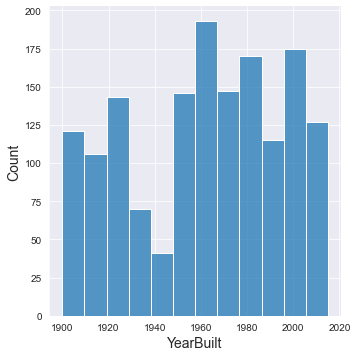

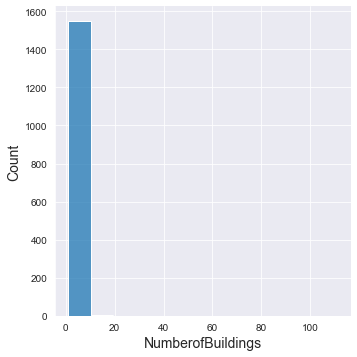

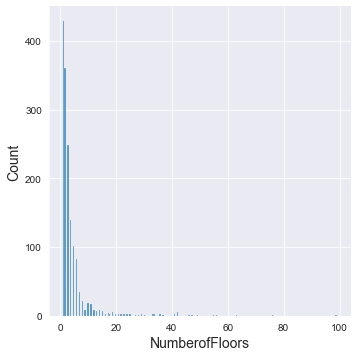

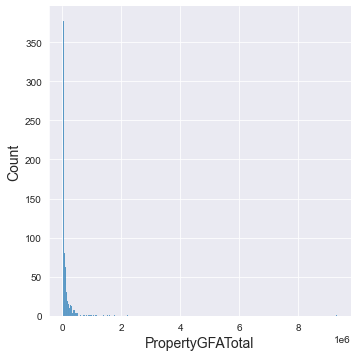

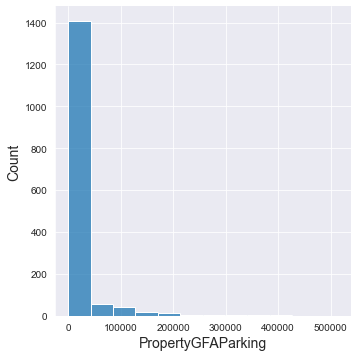

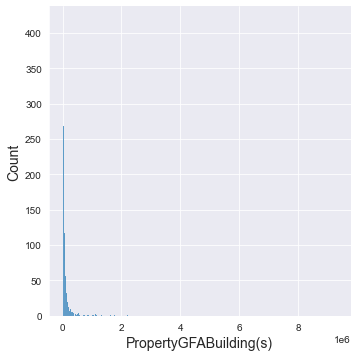

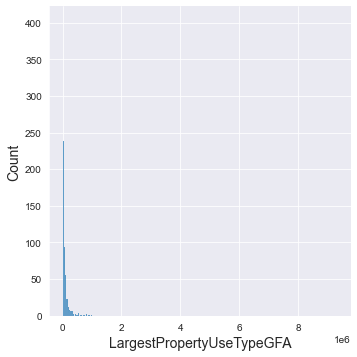

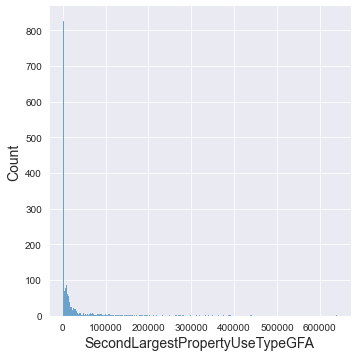

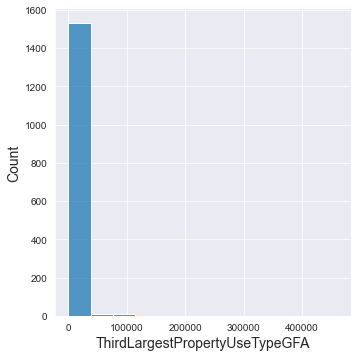

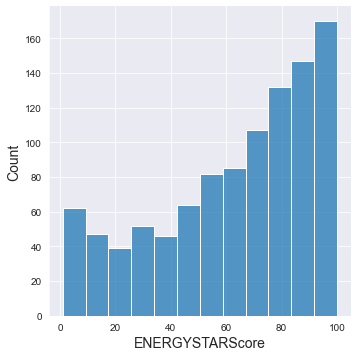

In [97]:
# Distribution des variables numériques
for col in num_col :
    sns.displot(df5_log[col])
    plt.xlabel(col, size = 14)
    plt.ylabel('Count', size = 14)
    plt.show()

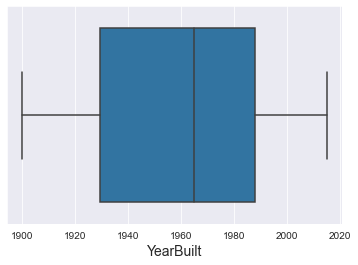

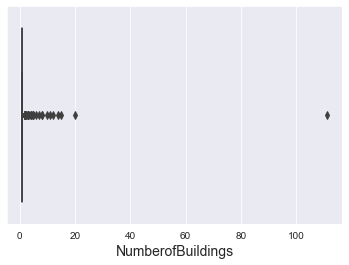

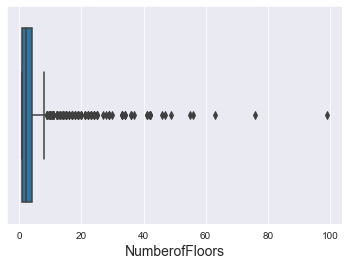

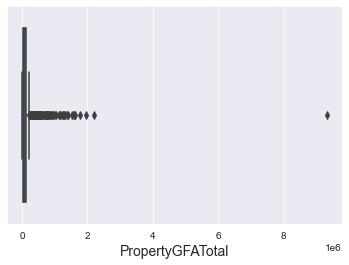

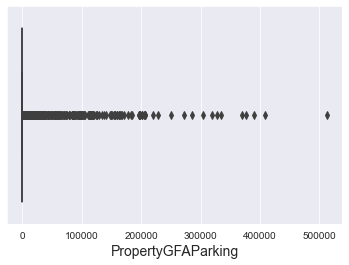

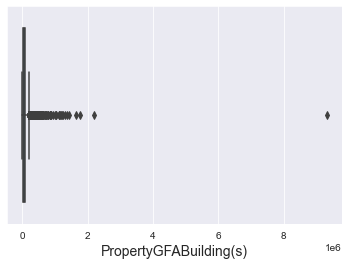

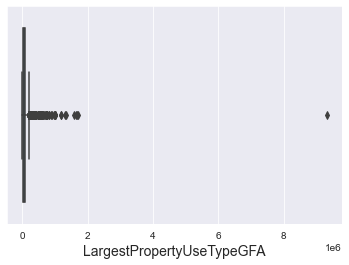

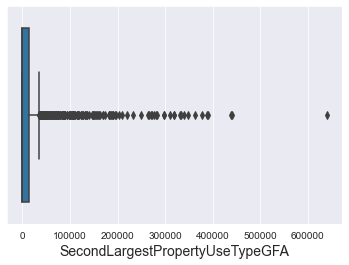

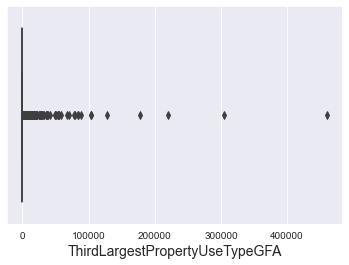

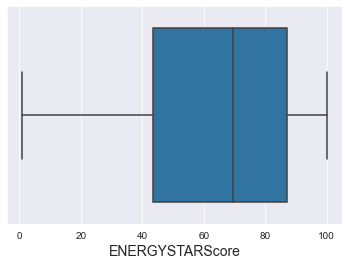

In [98]:
# Box-plot des variables numériques
for col in num_col :
    sns.boxplot(df5_log[col])
    plt.xlabel(col, size = 14)
    plt.show()

Il y a présence d'outliers pour la majorité des variables numériques.

### 5.2. Distribution des Targets

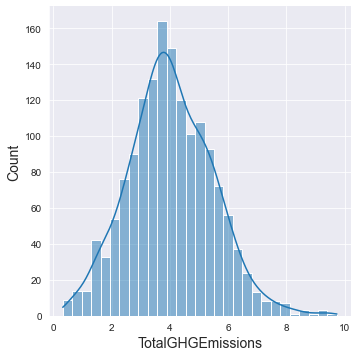

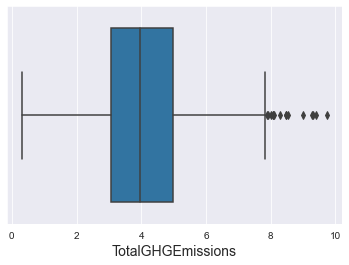

In [99]:
# Affichage de la distribution de TotalGHGEmissions sous forme de displot et boxplot
sns.displot(df5_log['TotalGHGEmissions'], kde=True)
plt.xlabel('TotalGHGEmissions',size = 14)
plt.ylabel('Count',size = 14)
plt.show()

sns.boxplot(df5_log['TotalGHGEmissions'])
plt.xlabel('TotalGHGEmissions',size = 14)
plt.show()

La distribution est toujours assez gaussienne, avec la présence d'outliers.

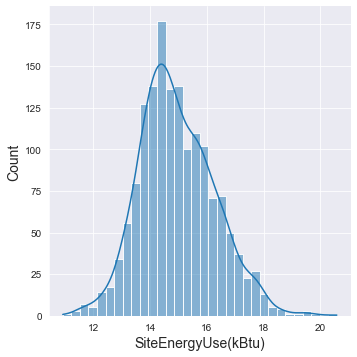

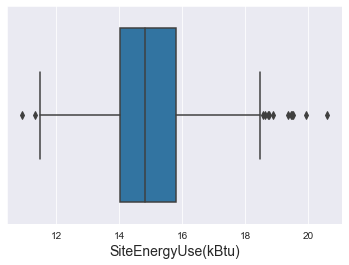

In [100]:
# Affichage de la distribution de SiteEnergyUse(kBtu) sous forme de displot et boxplot
sns.displot(df5_log['SiteEnergyUse(kBtu)'], kde=True)
plt.xlabel('SiteEnergyUse(kBtu)',size = 14)
plt.ylabel('Count',size = 14)
plt.show()

sns.boxplot(df5_log['SiteEnergyUse(kBtu)'])
plt.xlabel('SiteEnergyUse(kBtu)',size = 14)
plt.show()

La distribution est aussi assez gaussienne, avec la présence d'outliers de part et d'autre du box-plot.

### 5.3. Liens entre variables numériques
#### Corrélation entre les colonnes numériques

On va utiliser une matrice de corrélation pour voir le lien entre les variables numériques et les targets.

In [103]:
# création d'une fonction pour tracer la matrice des corrélations
# prend en paramètre le dataframe df

def mat_corr(df) :
    
    # variables dont on veut étudier les corrélations
    corr = df.select_dtypes('number').corr()
    
    # Génération d'un masque pour masquer le triangle supérieur et 
    # n'afficher que la partie basse de la matrice
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Initialisation de la figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Générationd d'un mapping pour les couleurs
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Graphe de la matrice des corrélations (= heatmap) avec le masque et affichage des valeurs de corrélation
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar= False, annot=True)
    plt.title("Matrice des corrélations")
    plt.show()

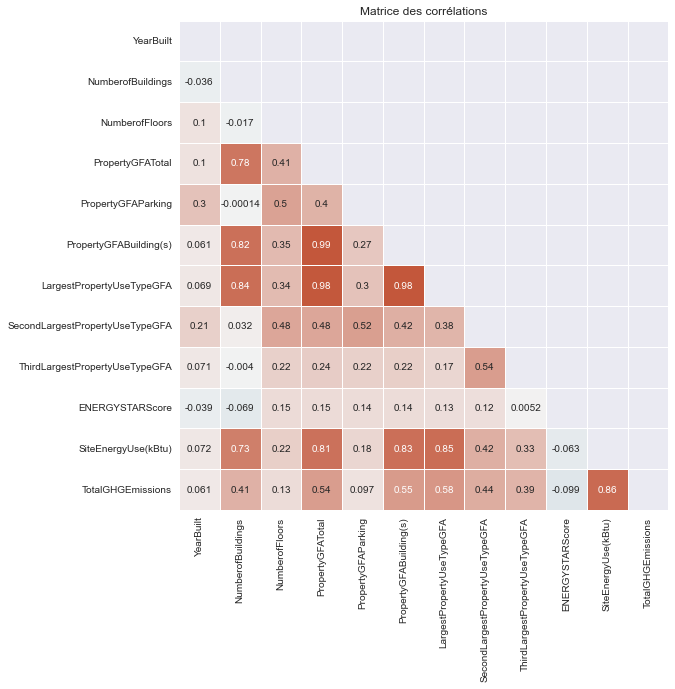

In [104]:
# On regarde sans le logarithme pour comparer ensuite
mat_corr(df5)

On voit que 
- TotalGHGEmissions est fortement corrélée de manière positive à SiteEnergyUse, moyennement corrélée aux surfaces des properties et au nombre de buildings.
- SiteEnergyUse est fortement corrélée aux surfaces des bâtiments (sauf les parking) et au nombre de Buildings (plus que ne l'est TotalGHGEmissions).
- Les 2 targets sont faiblement corrélément de manière négative à ENERGYSTARSCORE.
- PropertyGFATotal est fortement corrélée à PropertyGFABuilding(s)GFA, LargestPropertyUseTypeGFA, ainsi que NumberofBuildings.

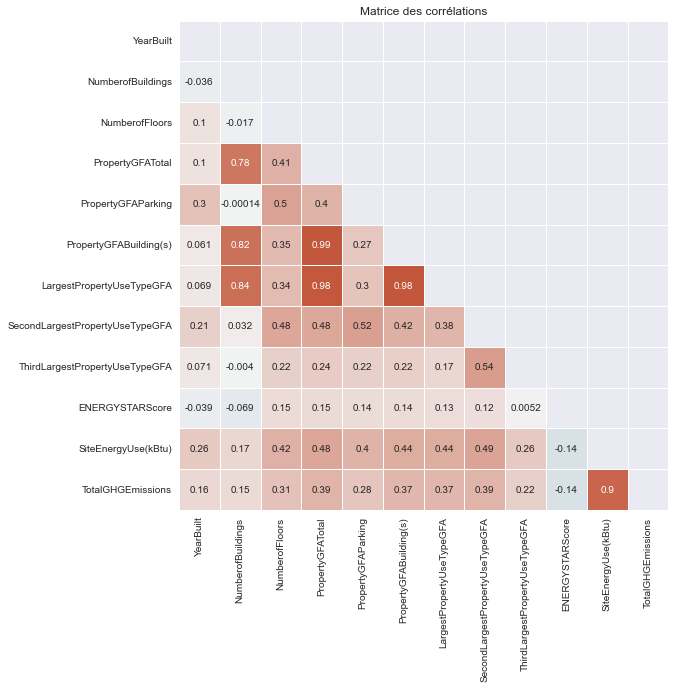

In [105]:
# Matrice de corrélation avec les targets passées au log
mat_corr(df5_log)

Par passage au log, on voit qu'on diminue la corrélation des targets avec les variables liées aux surfaces les plus importantes (PropertyGFATotal, PropertyGFABuilding(s), LargestPropertyUseTypeGFA), surtout pour SiteEnergyUse(kBtu).

 #### Lien variables numériques-targets

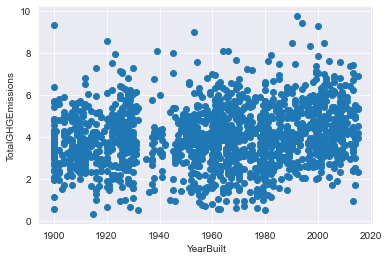

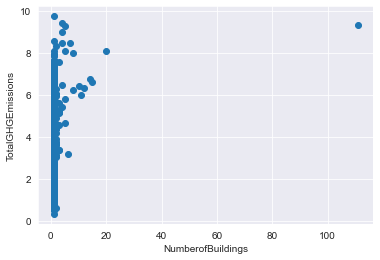

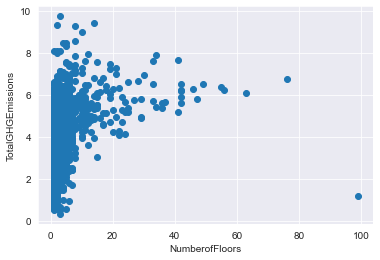

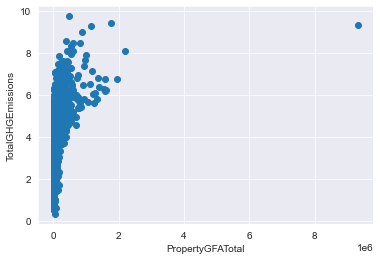

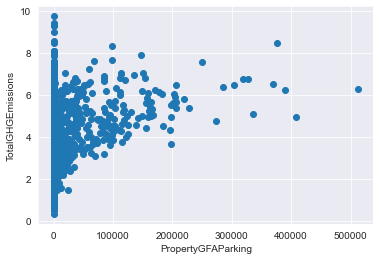

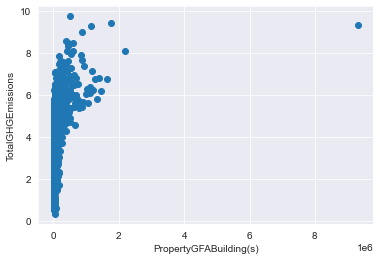

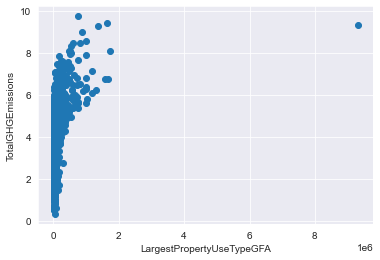

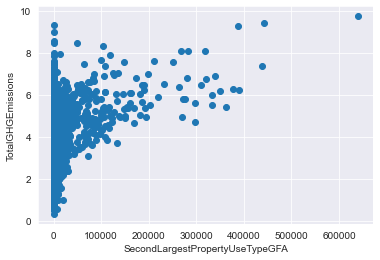

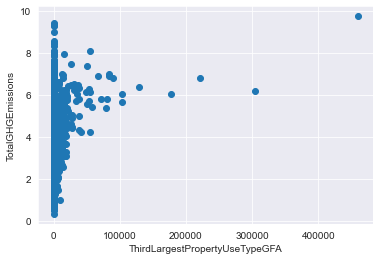

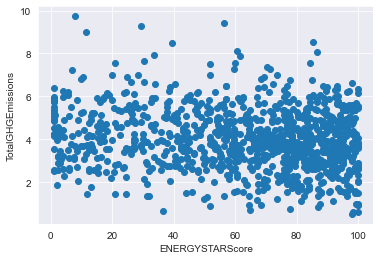

In [106]:
# Affichage sous forme de scatterplot de TotalGHGEmissions en fonction des variables numériques
for col in num_col :
    plt.scatter(x=df5_log[col], y = df5_log['TotalGHGEmissions'])
    plt.xlabel(col)
    plt.ylabel('TotalGHGEmissions')
    plt.show()

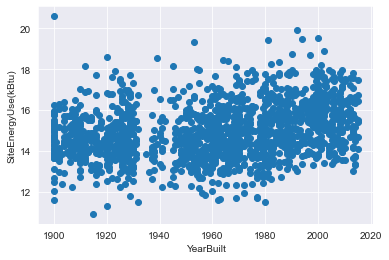

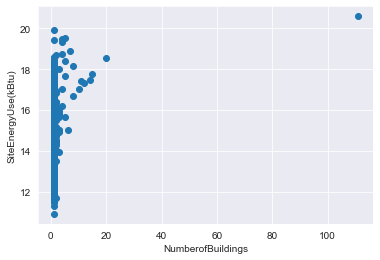

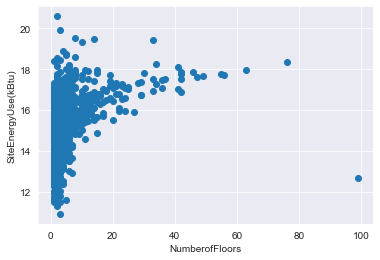

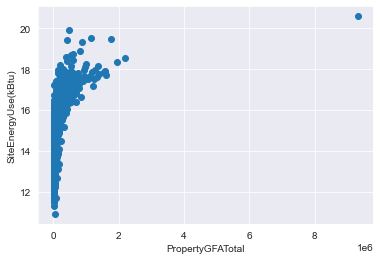

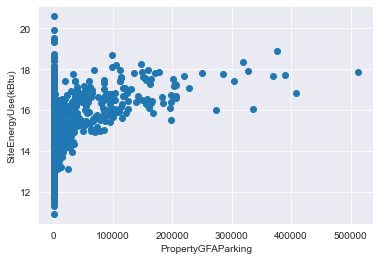

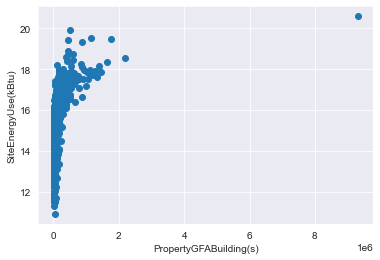

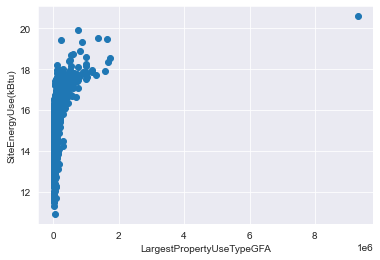

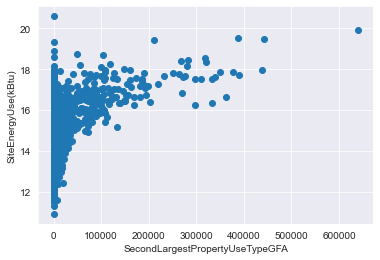

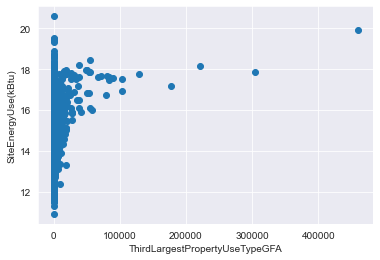

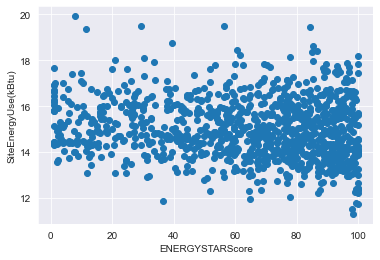

In [107]:
# Affichage sous forme de scatterplot de SiteEnergyUse(kBtu) en fonction des variables numériques
for col in num_col :
    plt.scatter(x=df5_log[col], y = df5_log['SiteEnergyUse(kBtu)'])
    plt.xlabel(col)
    plt.ylabel('SiteEnergyUse(kBtu)')
    plt.show()

On a un outlier avec de grandes surfaces et un avec un grand nombre de floors.

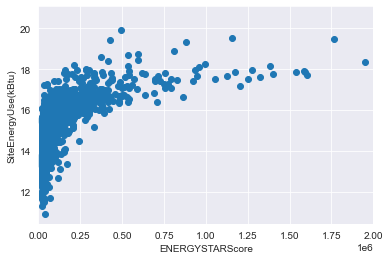

In [109]:
# Zoom entre SiteEnergyUse(kBtu) et PropertyGFATotal
plt.scatter(x=df5_log['PropertyGFATotal'], y = df5_log['SiteEnergyUse(kBtu)'])
plt.xlabel(col)
plt.ylabel('SiteEnergyUse(kBtu)')
plt.xlim([0,2e6])
plt.show()

On voit effectivement un lien (non linéaire) entre SiteEnergyUse(kBtu) et PropertyGFATotal.

#### Lien entre les variables numériques

Sans surprise, avec la matrice de corrélation, on voit que certaines variables sont très corrélées entre elles car elles dépendent les unes des autres (ou sont incluses dans les autres) :
- PropertyGFATotal et PropertyGFABuilding(s), LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA
mais peu de corrélation entre  PropertyGFATotal et PropertyGFAParking

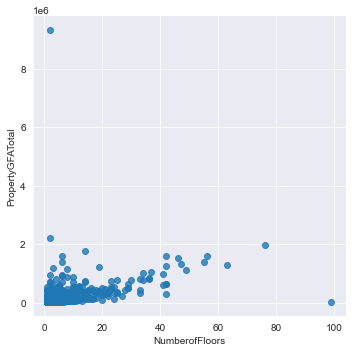

In [110]:
# PropertyGFATotal - NumberofFloors
sns.lmplot(x='NumberofFloors', y ='PropertyGFATotal', data=df5_log, fit_reg=False)
plt.show()

On voit bien ici la présence des 2 outliers.

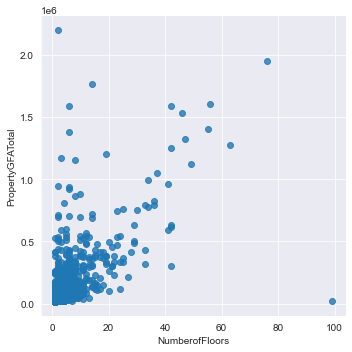

In [111]:
sns.lmplot(x='NumberofFloors', y ='PropertyGFATotal', 
           data=df5_log.drop(df5_log.loc[df5_log['PropertyGFATotal']>3e6].index), fit_reg=False)
plt.show()

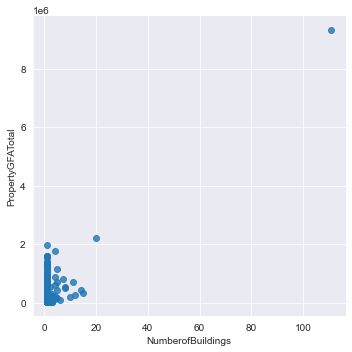

In [112]:
# PropertyGFATotal - NumberofBuildings
sns.lmplot(x='NumberofBuildings', y ='PropertyGFATotal', data=df5_log, fit_reg=False)
plt.show()

On voit bien la présence d'un outlier très différent des autres qui "plombe" la représentation.

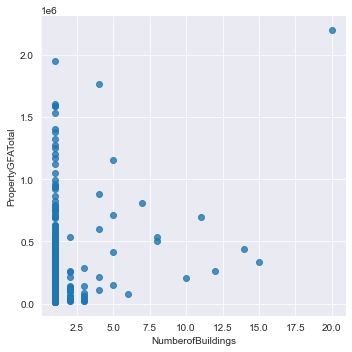

In [113]:
# Suppresion de l'outlier
sns.lmplot(x='NumberofBuildings', y ='PropertyGFATotal', 
           data=df5_log.drop(df5_log.loc[df5_log['PropertyGFATotal']>3e6].index), fit_reg=False)
plt.show()

### 5.4. Variables catégorielles

In [114]:
# Liste des variables catégorielles
var_cat = list(df5_log.select_dtypes('object').columns)
var_cat

['CouncilDistrictCode',
 'BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

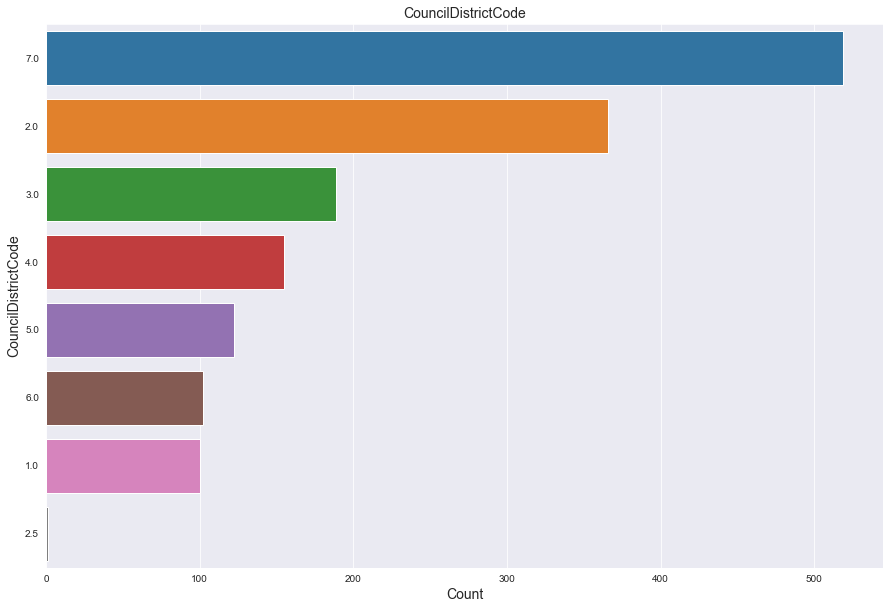

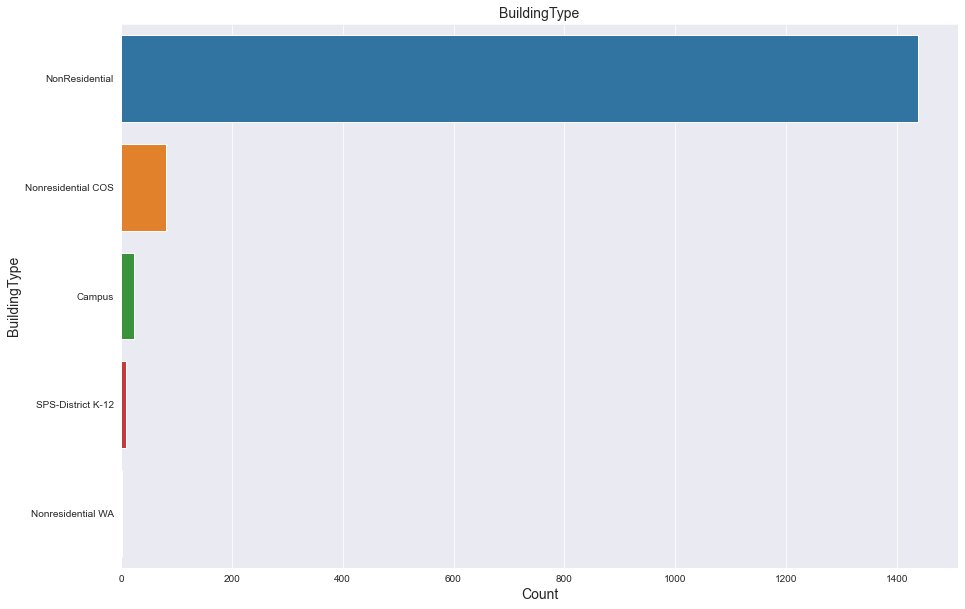

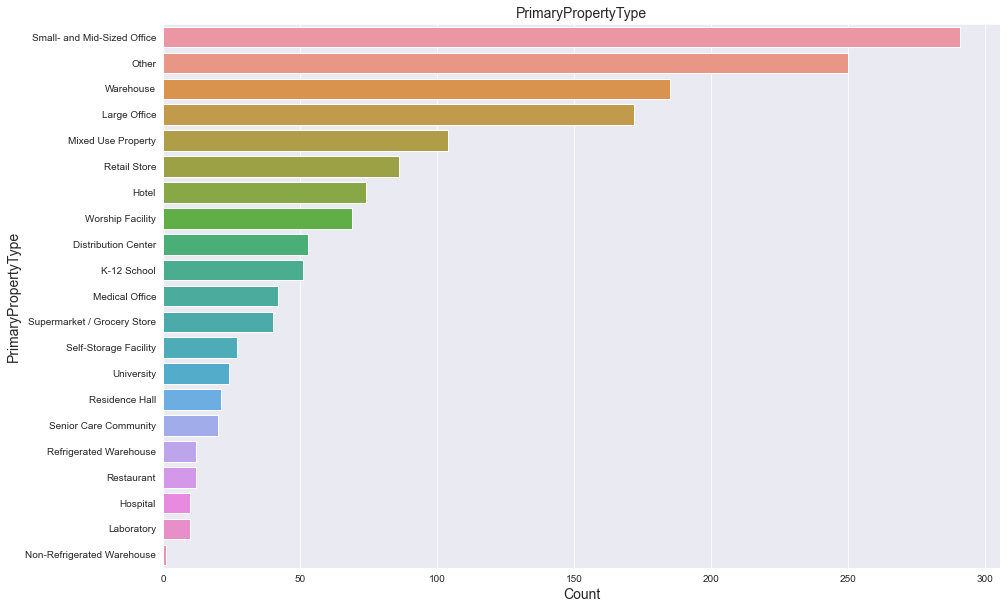

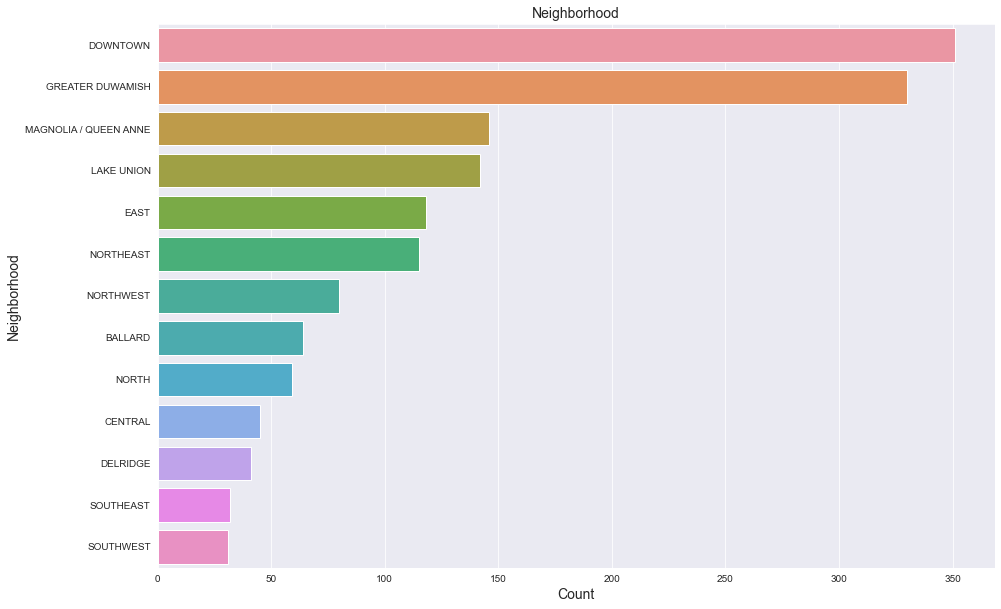

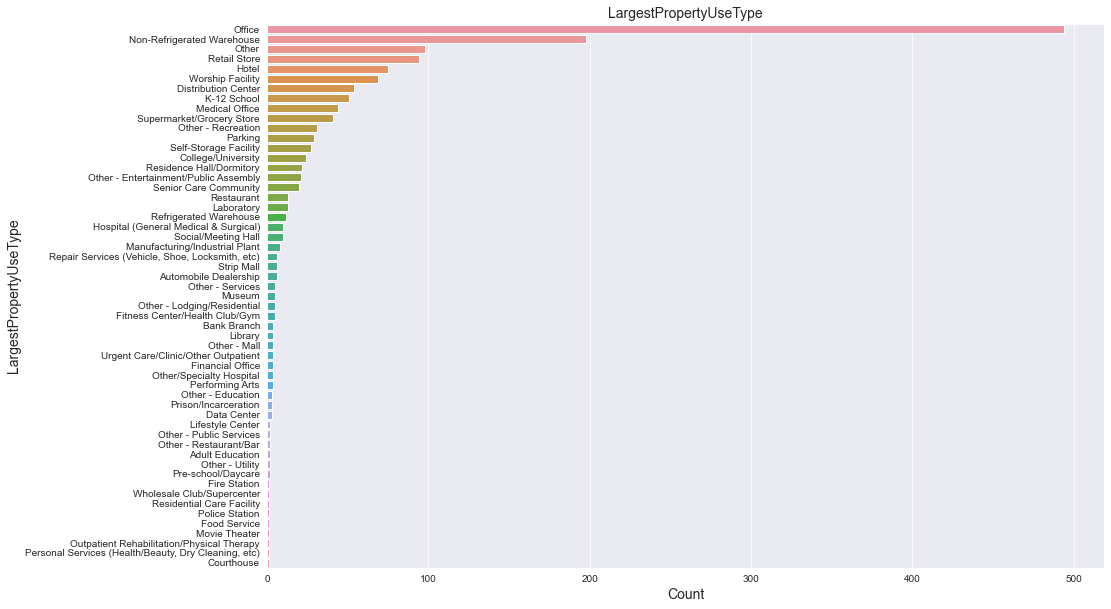

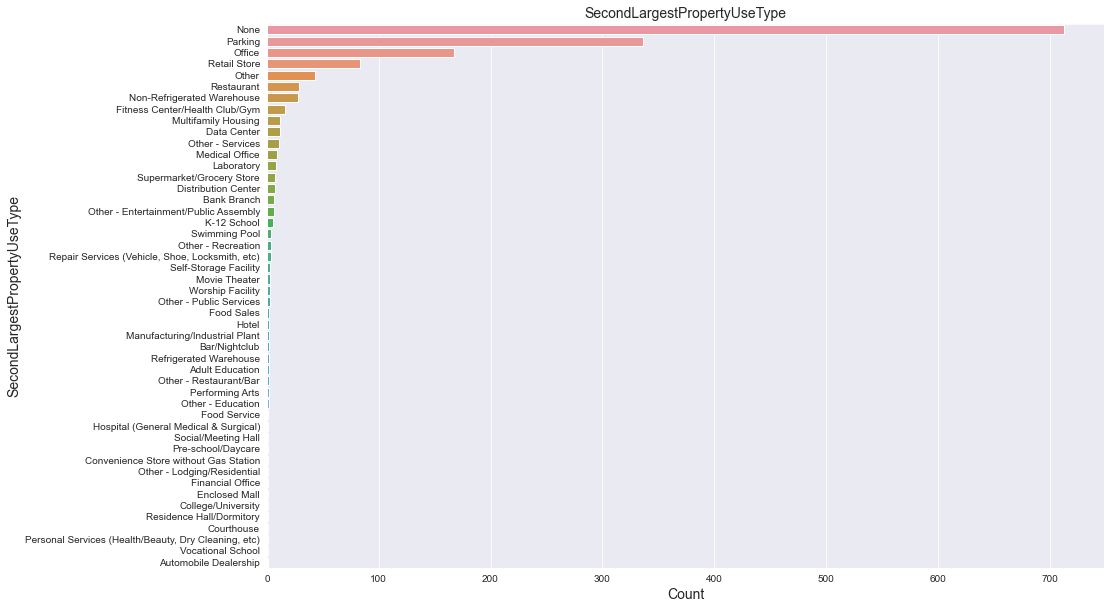

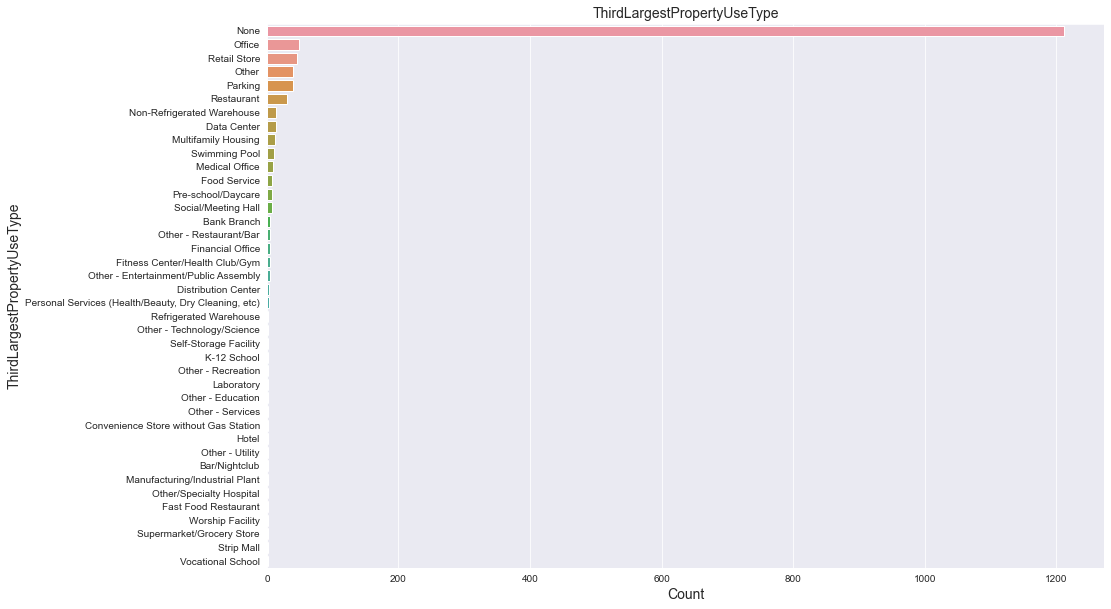

In [115]:
# Représentation en barplot des variables catégorielles

for cat in var_cat :
    fig = plt.figure(1, figsize=(15 ,10))
    df_cat = df5_log[cat].value_counts()
    sns.barplot(x = df_cat.values, y = df_cat.index )
    plt.title(cat, size = 14)
    plt.ylabel(cat, size = 14)
    plt.xlabel('Count', size = 14)
    plt.show()

On remarque que :
- Majoritairement les CouncilDistrictCode 7 et 2
- Très très Majoritairement la valeur NonResidential pour BuildingType
- Les 2 principales valeurs de PrimaryPropertyType sont Small- Mid-Sized Office et Other
- La majorité des batiments sont situés à Downtown et Greater Duwamich
- Très majoritairement le LargestPropertyUseType est Office
- Les 2 principales valeurs de SecondLargestPropertyUseType sont None et Parking
- Plus de 75% des batiments n'ont pas de ThirdLargestPropertyUseType.

On remarque que la PrimaryPropertyType de type Non-Refrigerated Warehouse prend moins de 10 valeurs. Si elle est toujours présente après le traitement des données pour la modélisation, on la regroupera avec la catégorie 'Warehouse'.

CouncilDistrictCode prend une valeur demi-entière : comme son occurrence est très faible, on modifiera cette valeur par la suite si besoin d'utiliser la colonne.

#### Lien variables catégorielles et targets

On fait des visualisations par boxplots et barplot.

In [116]:
# Définition d'une fonction pour tracer des boxplots
# prend en argument la variable quantitative vquant, la variable qualitative vqual, le dataframe df, 
# selon une autre variable qualitative vqual2, mise à None par défaut

def boxplot(vquan,vqual,df,vqual2=None) :
    
    #initialisation de la figure
    f,ax = plt.subplots(figsize = (12,12))
    sns.boxplot(x= vquan, y = vqual,data = df, hue= vqual2, orient = 'h')
    plt.yticks(fontsize=14)
    plt.xlabel(vquan,fontsize=14)
    
    plt.show()

In [117]:
# Définition d'une fonction pour tracer des barplots
# prend en argument la variable quantitative vquant, la variable qualitative vqual, le dataframe df, 
# selon une autre variable qualitative vqual2, mise à None par défaut

def barplot(vquan,vqual,df,vqual2=None) :
    
    #initialisation de la figure
    f,ax = plt.subplots(figsize = (15,8))
    cat = df[vqual].unique()
    
    #ordre d'affichage des barres, du plus "gros" au plus "petit"
    order = df.groupby([vqual])[vquan].sum().sort_values(ascending=False).index
    g = sns.barplot(x=vquan,y=vqual,data = df, hue = vqual2, estimator = sum, ci = 0, order = order)
    #estimator = estimateur de la barre, ici on additionne les valeurs de vquan pour chaque catégorie de vqual
    
    plt.ylabel(vqual)
    plt.yticks(fontsize=12)
    plt.xlabel(vquan,fontsize=12)

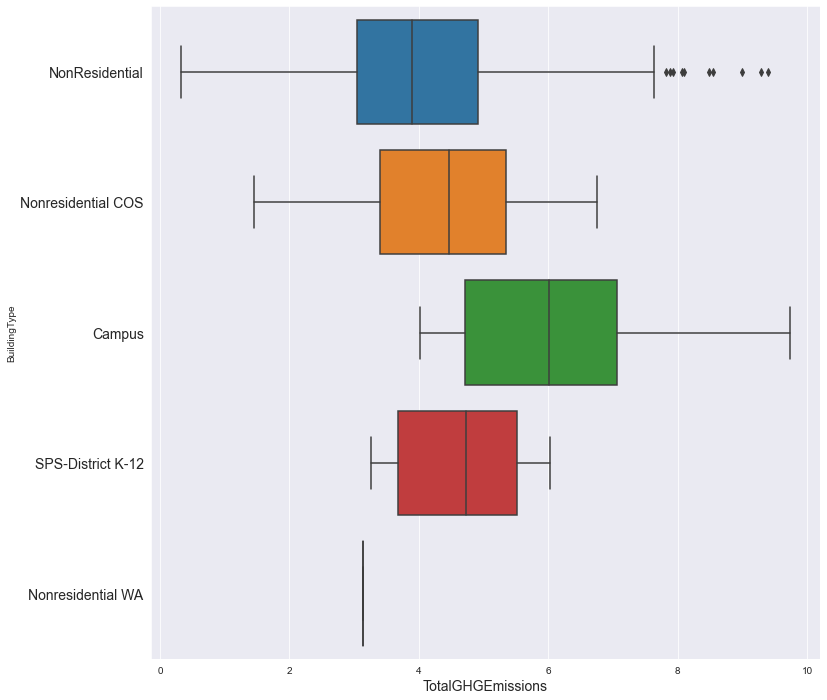

In [118]:
boxplot('TotalGHGEmissions','BuildingType',df5_log)

Présence d'Outliers pour NonResidential

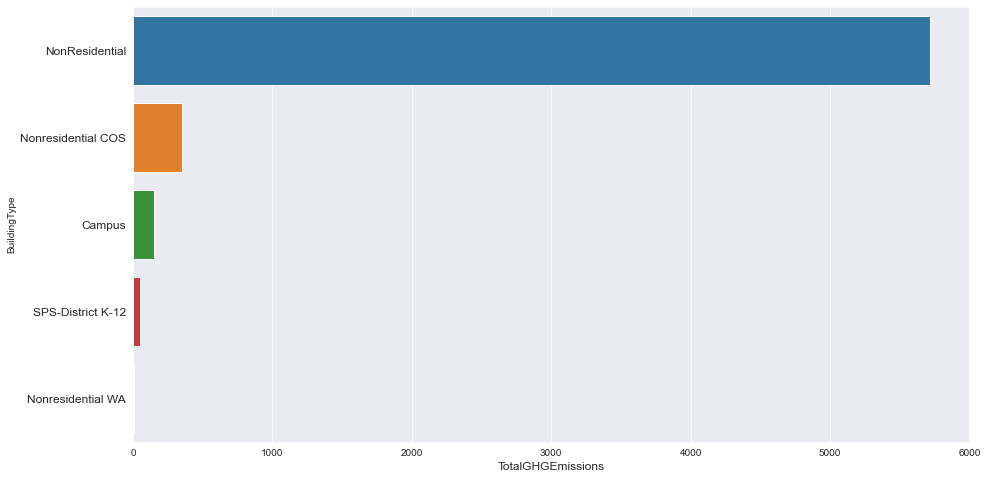

In [119]:
barplot('TotalGHGEmissions','BuildingType',df5_log)

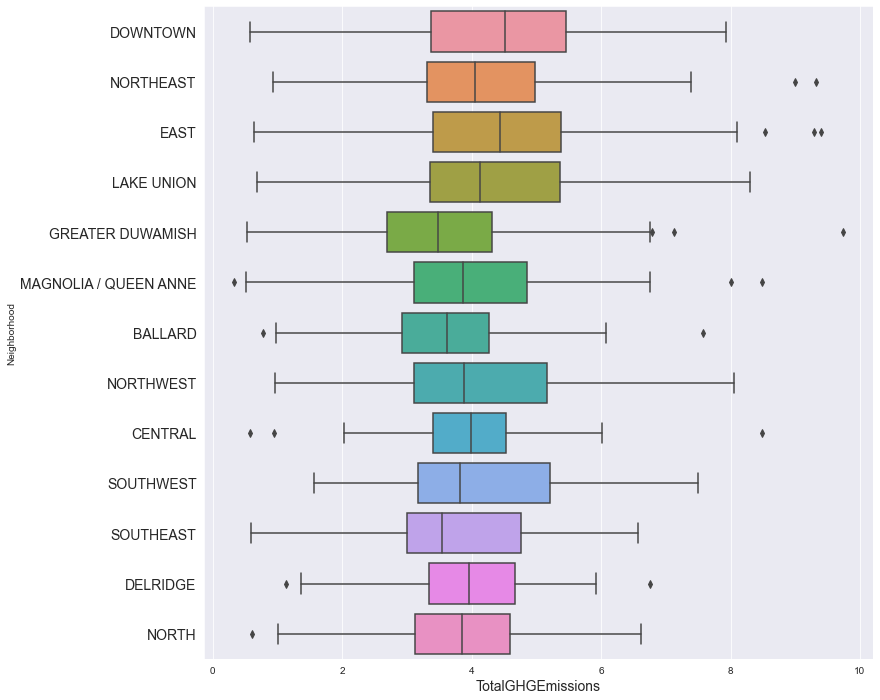

In [120]:
boxplot('TotalGHGEmissions','Neighborhood',df5_log)

Ici aussi présence d'outliers pour la majorité des Neighborhood.

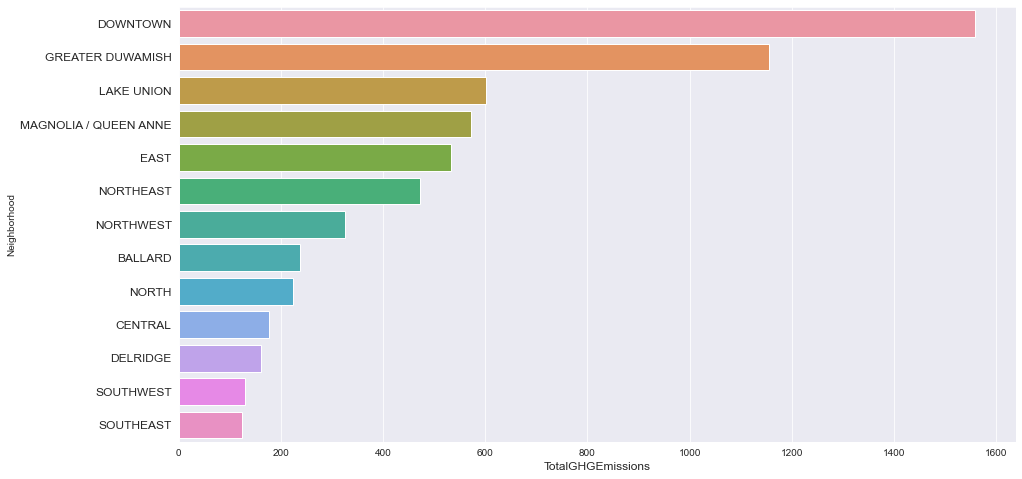

In [121]:
barplot('TotalGHGEmissions','Neighborhood',df5_log)

Majoritairement le centre ville qui émet TotalGHGEmissions.

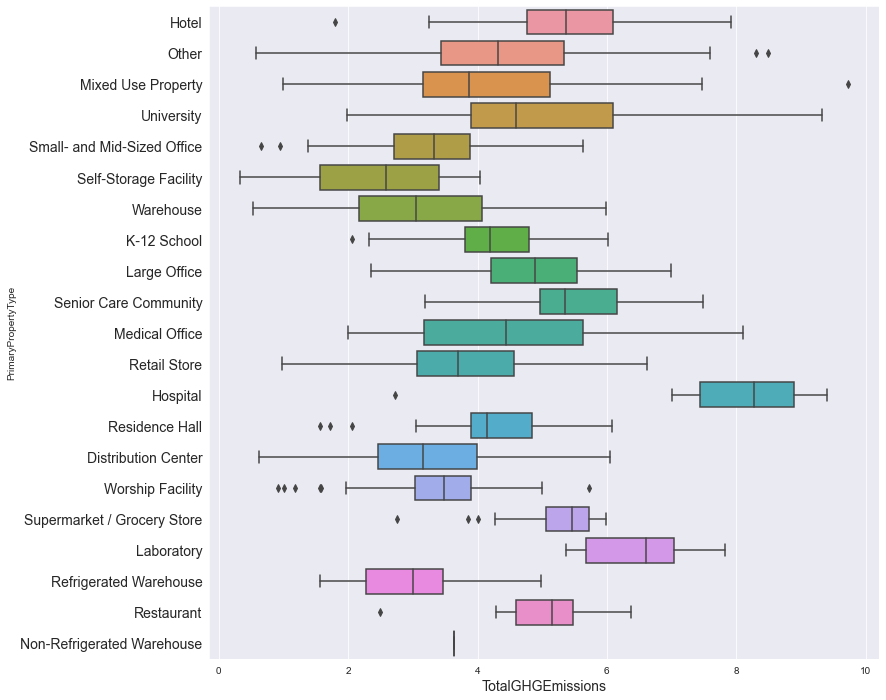

In [122]:
boxplot('TotalGHGEmissions','PrimaryPropertyType',df5_log)

Les Hospital et Laboratory ont des TotalGHGEmissions élevées, celles de University sont étalées.

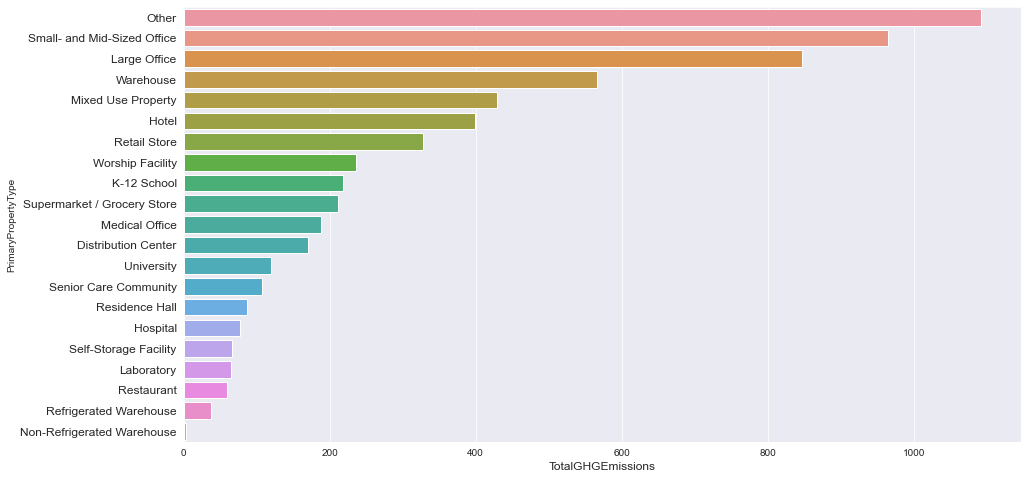

In [123]:
barplot('TotalGHGEmissions','PrimaryPropertyType',df5_log)

Majoritairement Other et Small- and Mid-Sized Office qui émettent le plus de TotalGHGEmissions.

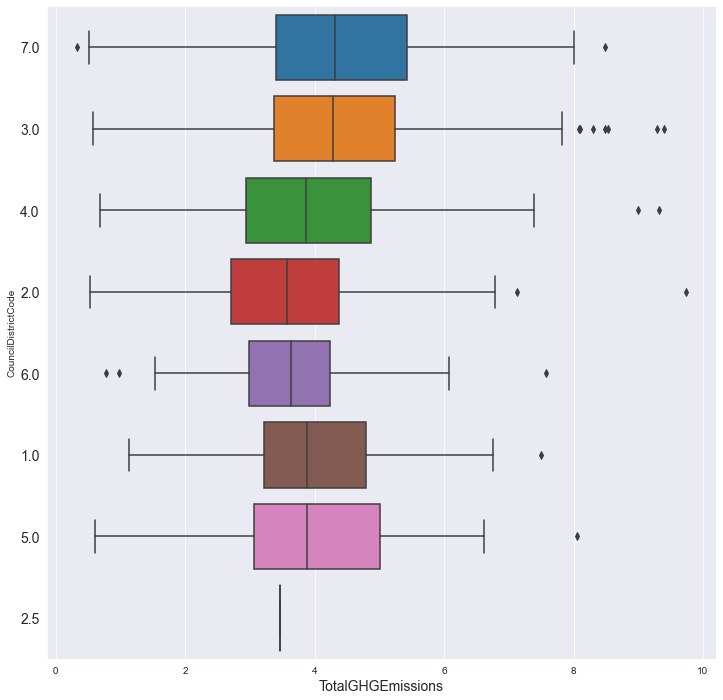

In [124]:
boxplot('TotalGHGEmissions','CouncilDistrictCode',df5_log)

Répartition assez équilibrée

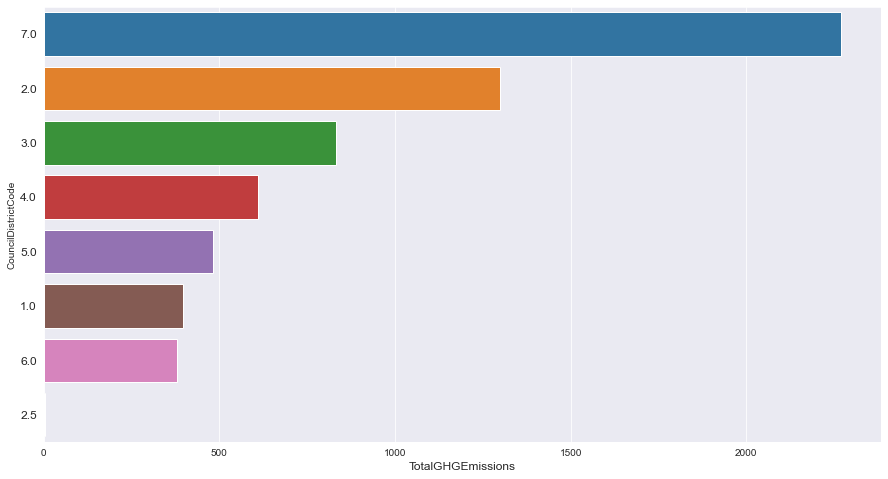

In [125]:
barplot('TotalGHGEmissions','CouncilDistrictCode',df5_log)

Il y a des émissions principalement dans le CouncilDistrictCode n°7

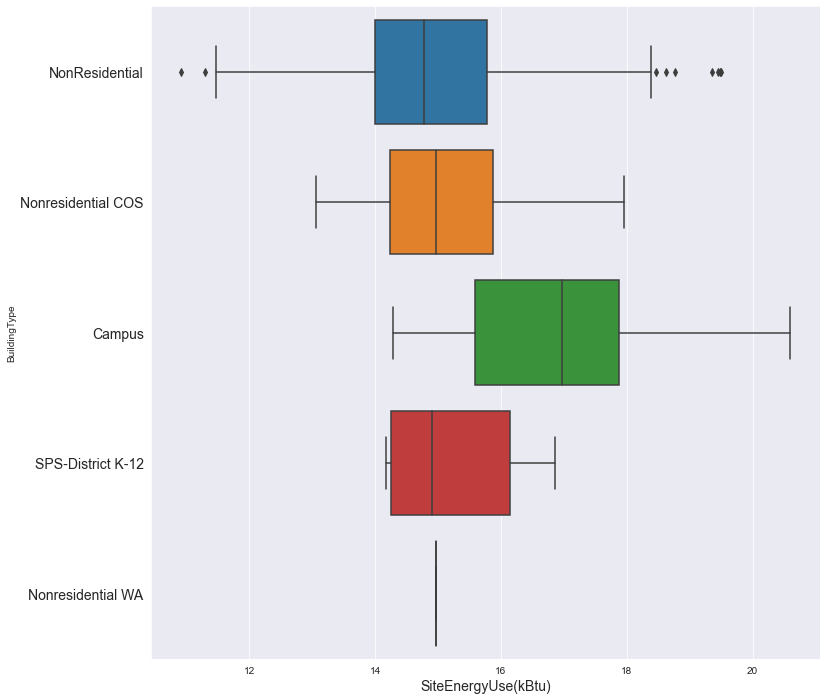

In [126]:
boxplot('SiteEnergyUse(kBtu)','BuildingType',df5_log)

Quelques outliers dans le BuildingType NonResidential. 

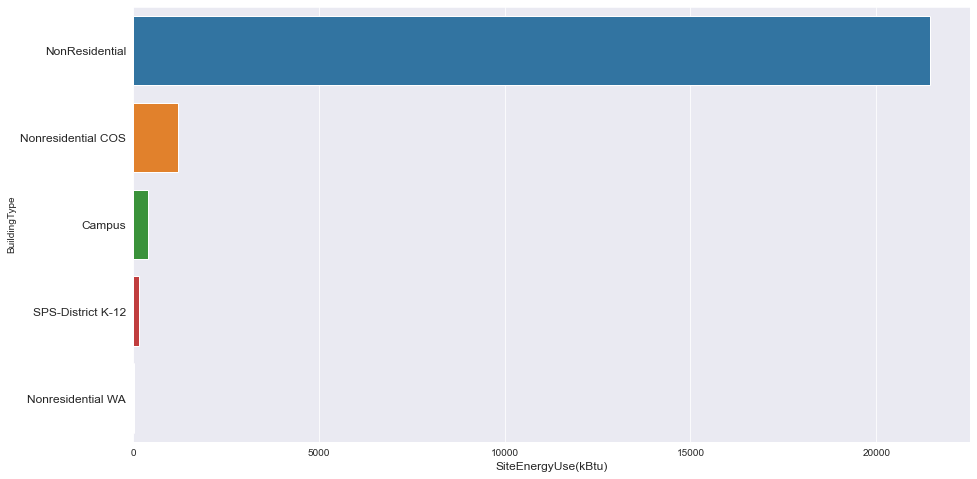

In [127]:
barplot('SiteEnergyUse(kBtu)','BuildingType',df5_log)

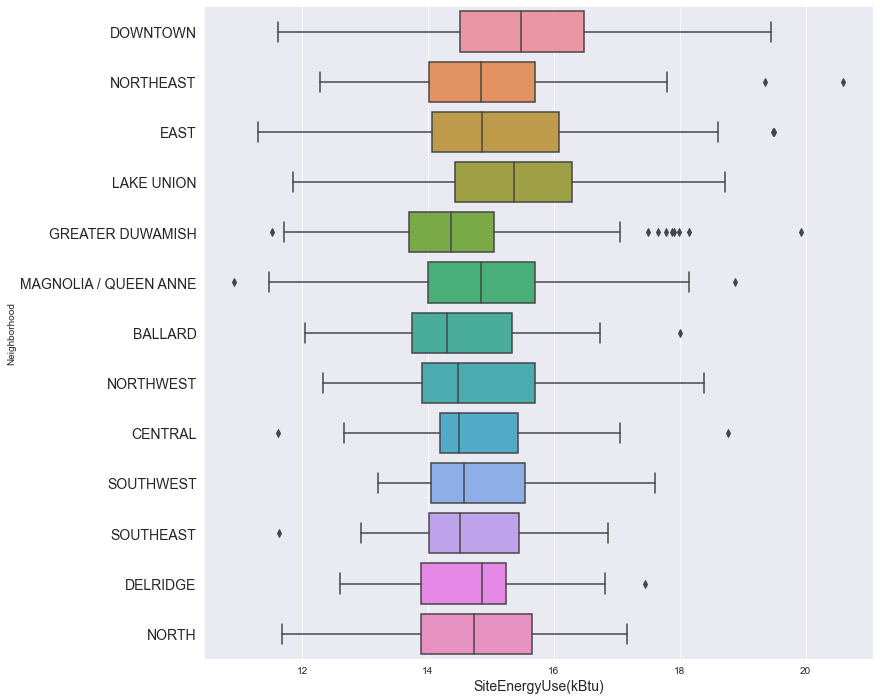

In [128]:
boxplot('SiteEnergyUse(kBtu)','Neighborhood',df5_log)

Des outliers dans plusieurs Neighborhoods.

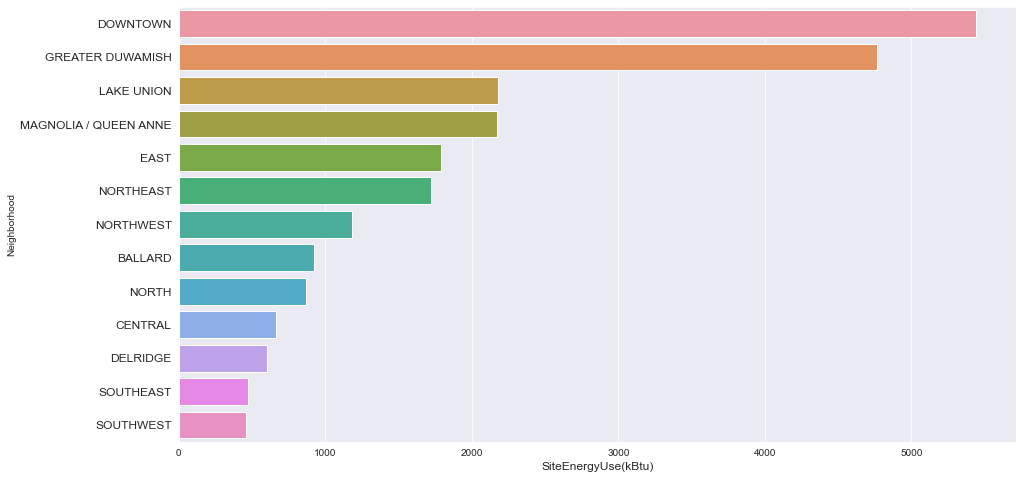

In [129]:
barplot('SiteEnergyUse(kBtu)','Neighborhood',df5_log)

Ici, majoritairement à DOWNTOWN et GREATER DUWAMISH que SiteEnergyUse(kBtu) est le plus important.

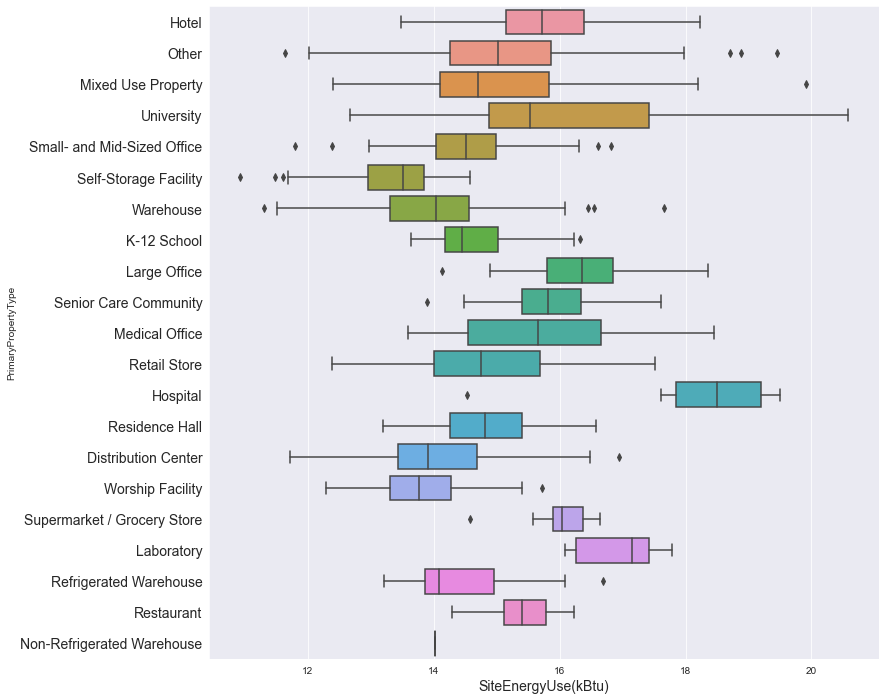

In [130]:
boxplot('SiteEnergyUse(kBtu)','PrimaryPropertyType',df5_log)

Comme pour TotalGHGEmissions, Hospital a des hautes valeurs de SiteEnergyUse(kBtu) et pour University elle est très étalée.

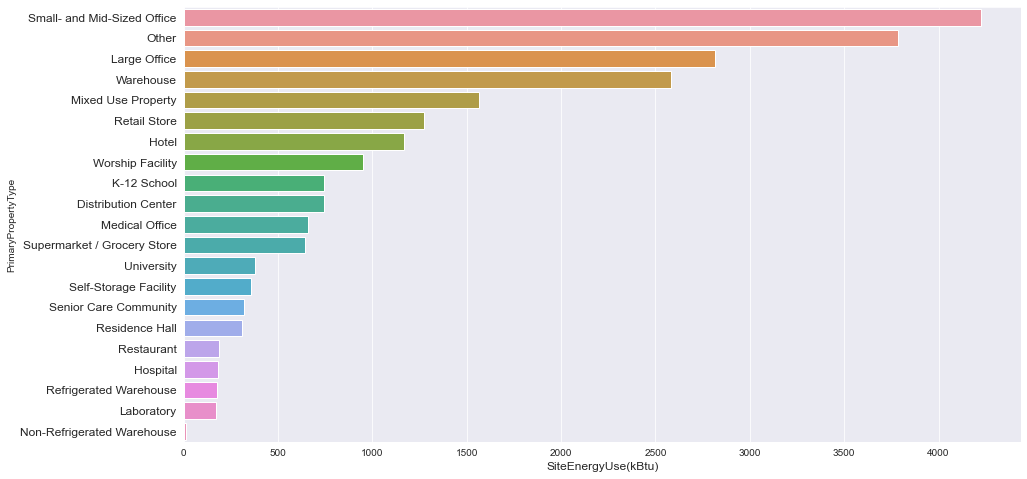

In [131]:
barplot('SiteEnergyUse(kBtu)','PrimaryPropertyType',df5_log)

C'est majoritairement Small- and Mid-Sized Office et Other qui ont le plus de SiteEnergyUse(kBtu).

On va regarder si ce sont les mêmes bâtiments avec à la fois des valeurs élevées pour TotalGHGEmissions et pour SiteEnergyUse(kBtu).

In [132]:
# On retourne la liste des indices avec TotalGHGEmissions > 8
liste_outl_CO2 = []
for ind, val in df5_log.iterrows() :
    if (val['TotalGHGEmissions'] > 8) == True :
        liste_outl_CO2.append(ind)
liste_outl_CO2

[30, 102, 129, 131, 288, 556, 912, 984, 987, 1233, 1501, 1512, 1517]

In [133]:
# On retourne la liste des indices avec SiteEnergyUse(kBtu) > 18
liste_outl_energy = []
for ind, val in df5_log.iterrows() :
    if (val['SiteEnergyUse(kBtu)'] > 18) == True :
        liste_outl_energy.append(ind)
liste_outl_energy

[2,
 30,
 43,
 84,
 102,
 129,
 131,
 257,
 288,
 421,
 498,
 518,
 556,
 912,
 984,
 987,
 1233,
 1501,
 1512,
 1517]

On voit que l'on a quasiment les mêmes batiments qui sont des outliers pour les 2 targets.

In [134]:
# Intersection des 2 listes
liste_outl = list(set(liste_outl_CO2).intersection(liste_outl_energy))
liste_outl.sort()
liste_outl

[30, 102, 129, 131, 288, 556, 912, 984, 987, 1233, 1501, 1512, 1517]

In [135]:
# Affichage du PrimaryPropertyType pour cette liste d'outliers
for indx in liste_outl :
    print(df5_log.loc[[indx],['PrimaryPropertyType']])

   PrimaryPropertyType
30  Mixed Use Property
    PrimaryPropertyType
102            Hospital
    PrimaryPropertyType
129            Hospital
    PrimaryPropertyType
131            Hospital
    PrimaryPropertyType
288               Other
    PrimaryPropertyType
556            Hospital
    PrimaryPropertyType
912          University
    PrimaryPropertyType
984            Hospital
    PrimaryPropertyType
987      Medical Office
     PrimaryPropertyType
1233          University
     PrimaryPropertyType
1501               Other
     PrimaryPropertyType
1512            Hospital
     PrimaryPropertyType
1517          University


Ce sont surtout les hopitaux et universités qui ont des TotalGHGEmissions assez élevées ainsi que des SiteEnergyUse élevées aussi.

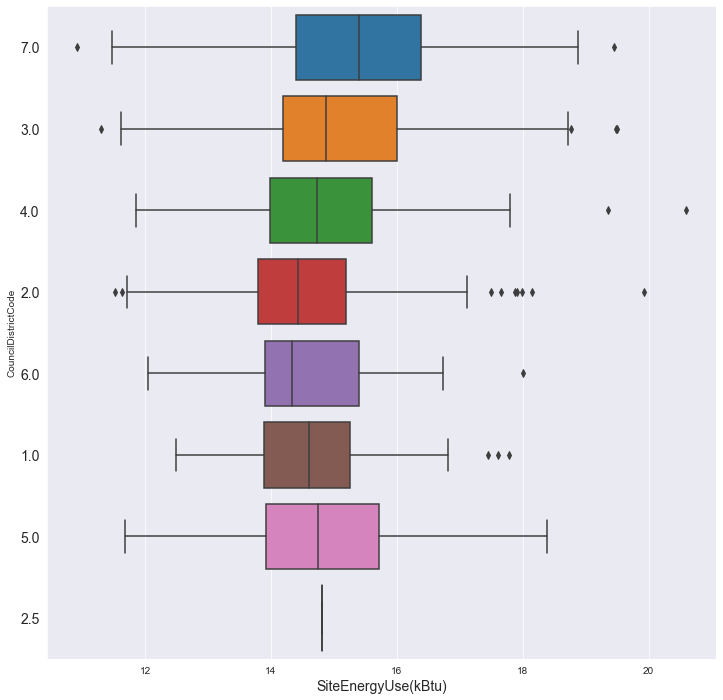

In [136]:
boxplot('SiteEnergyUse(kBtu)','CouncilDistrictCode',df5_log)

Outliers dans un peu tous les CouncilDistrictCode

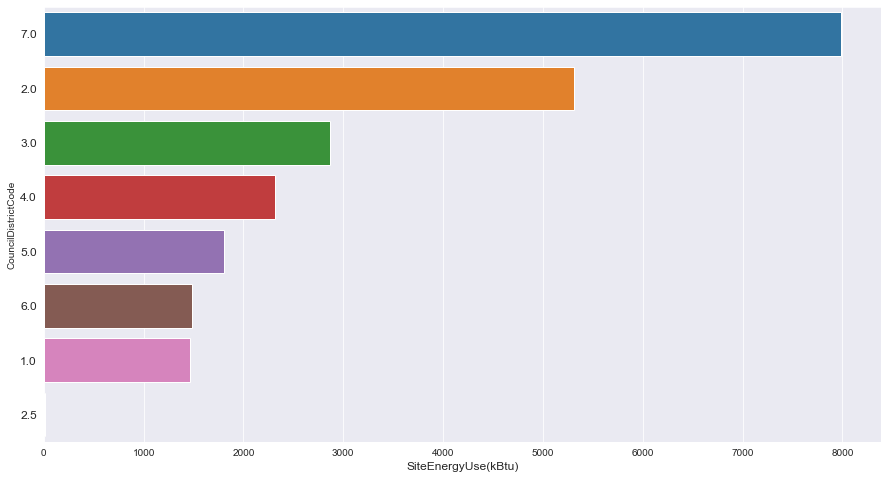

In [137]:
barplot('SiteEnergyUse(kBtu)','CouncilDistrictCode',df5_log)

#### Lien entre les variables catégorielles

On va regarder le lien entre les variables catégorielles à l'aide d'une heatmap et d'un test de Chi2.

In [142]:
# Fonction qui dessine la heatmap entre 2 variables qualitatives, 
# affiche également les résultats du test du Chi2 associé
# prend en paramètres les variables qualitatives var1 et var2, ainsi que le dataframe df

def tab_cont(var1, var2, df) :
    
    # initialisation de la figure
    plt.figure(figsize=(12,12))
    
    # création du tableau de contingence
    tab_cont = pd.crosstab(df[var1], df[var2])
    
    # heatmap
    h = sns.heatmap(tab_cont, annot=True, cmap= 'Blues', fmt='g')
    plt.title('Heatmap entre {} et {}'.format(var1,var2), size = 14)
    plt.show()
    
    # Test Chi2 pour évaluer le lien entre ces 2 variables
    st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(tab_cont)
    # valeur du chi2, valeur de la p-value, nombre de degrés de libertés ((len(X)-1)*(len(Y)-1)
    # st_exp = array des valeurs attendues calculées selon les marges du tableau
    print("Lien entre : {} et {}".format(var1,var2))
    print("valeur du Chi2 : %.2f" %st_chi2)
    print("valeur de la p-value : %f" %st_p)
    print("nombre de degrés de liberté : %d" %st_dof)

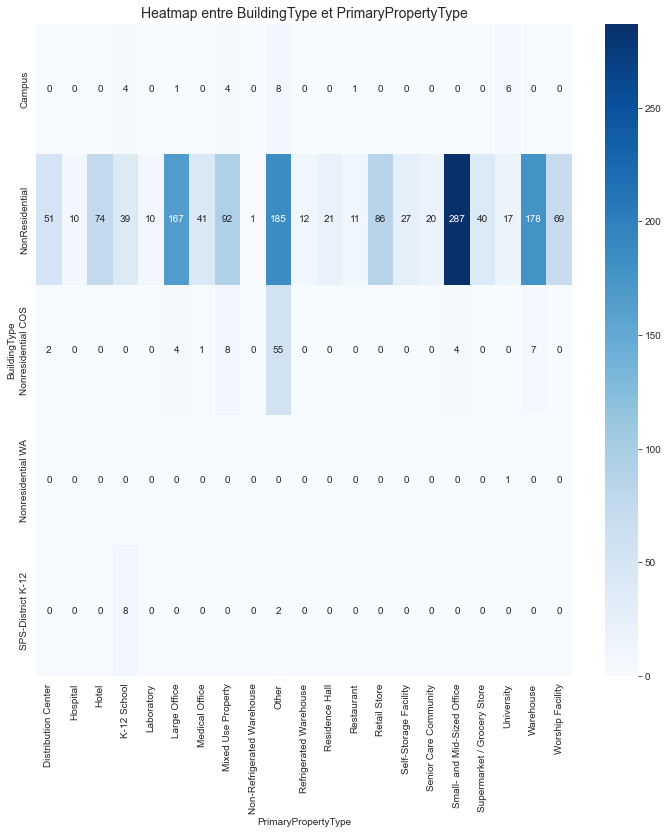

Lien entre : BuildingType et PrimaryPropertyType
valeur du Chi2 : 566.13
valeur de la p-value : 0.000000
nombre de degrés de liberté : 80


In [143]:
tab_cont('BuildingType', 'PrimaryPropertyType', df5_log)

On voit que la catégorie NonResidential a quasiment des effectifs non nuls dans toutes les catégories de PrimaryPropertyType (1/22 effectif nul).

Comme on a éliminé les bâtiments d'habitation, on va peut être supprimer la colonne BuildingType pour garder PrimaryPropertyType qui est plus détaillée.

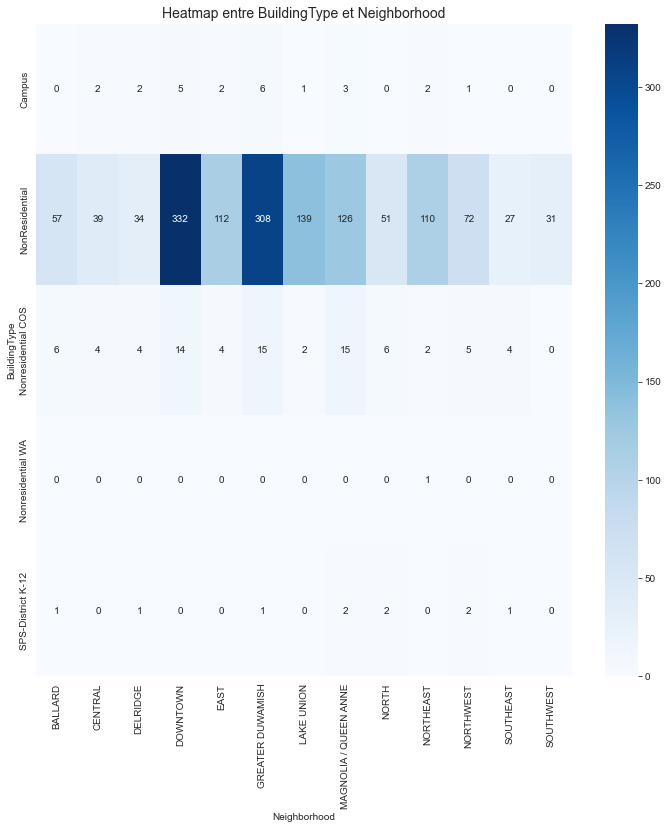

Lien entre : BuildingType et Neighborhood
valeur du Chi2 : 77.43
valeur de la p-value : 0.004519
nombre de degrés de liberté : 48


In [144]:
tab_cont('BuildingType', 'Neighborhood', df5_log)

On voit que majoritairement les NonResidential sont à Downtown et Greater Dunwamish.

Là aussi pour le BuildingType NonResidential, il y a des effectifs dans toutes les catégories de Neighborhood (sauf 1).

De même, les BuildingType Multifamily LR et MR, SPS-Distric K-12 et Nonresidential COS  ont quasiment des effectifs dans toutes les catégories de Neighborhood.

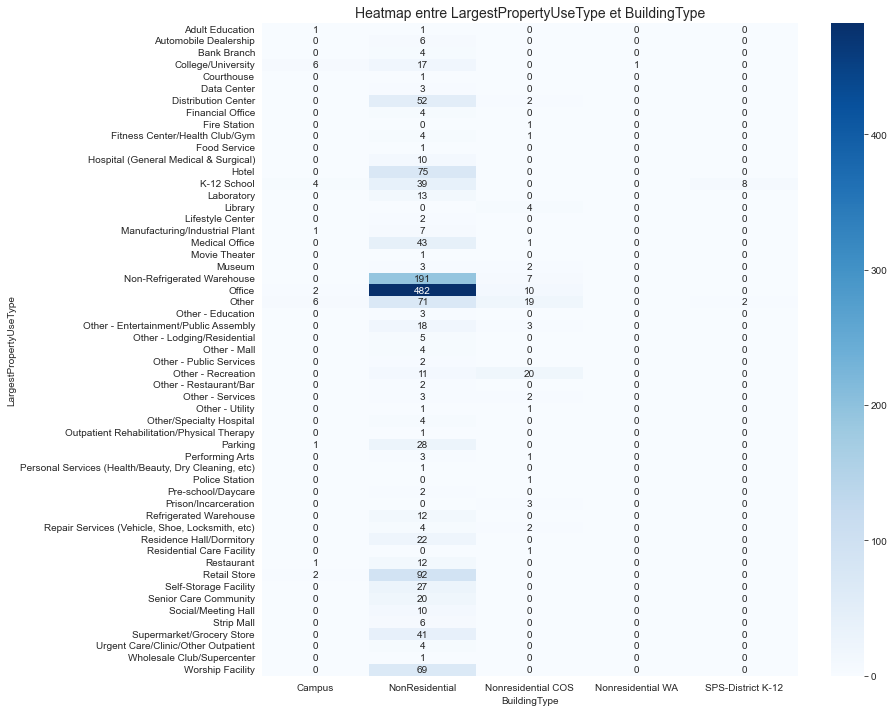

Lien entre : LargestPropertyUseType et BuildingType
valeur du Chi2 : 966.95
valeur de la p-value : 0.000000
nombre de degrés de liberté : 216


In [145]:
tab_cont('LargestPropertyUseType', 'BuildingType', df5_log)

Ici aussi on voit que le BuildingType NonResidential a des effectifs dans quasiment toutes les catégories de LargestPropertyUseType

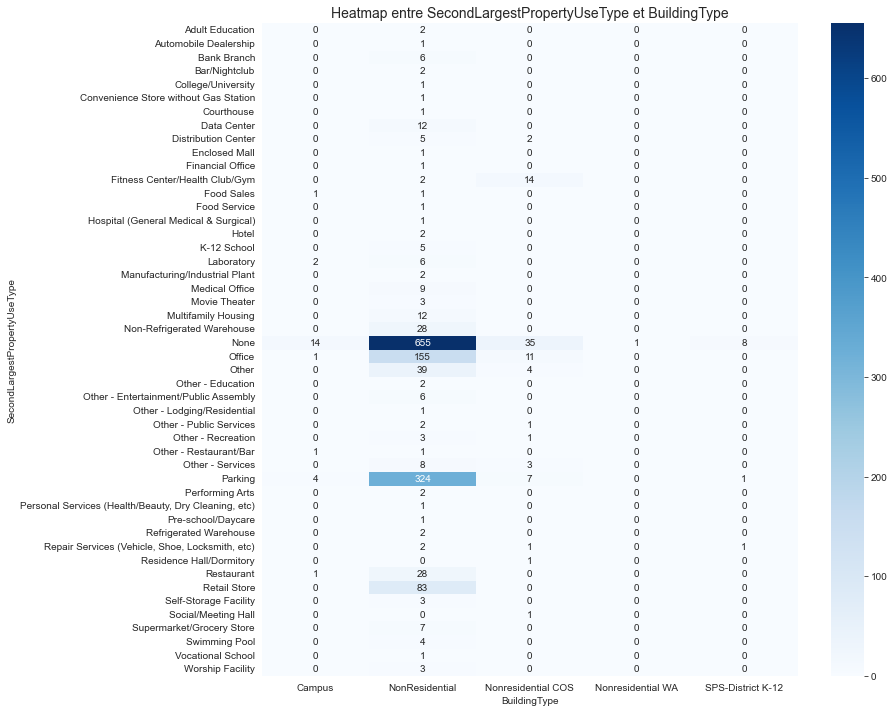

Lien entre : SecondLargestPropertyUseType et BuildingType
valeur du Chi2 : 450.71
valeur de la p-value : 0.000000
nombre de degrés de liberté : 188


In [146]:
tab_cont('SecondLargestPropertyUseType', 'BuildingType', df5_log)

On remarque que la SecondLargestPropertyUseType est principalement des None puis des parkings.

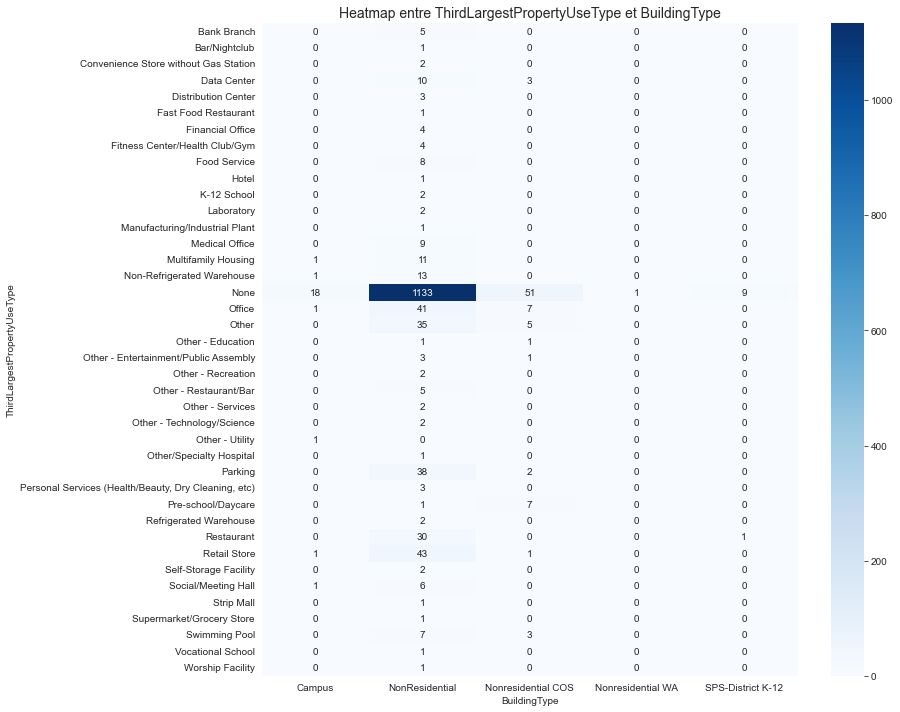

Lien entre : ThirdLargestPropertyUseType et BuildingType
valeur du Chi2 : 251.00
valeur de la p-value : 0.000002
nombre de degrés de liberté : 156


In [147]:
tab_cont('ThirdLargestPropertyUseType', 'BuildingType', df5_log)

On remarque que la ThirdLargestPropertyUseType est très majoritairement None pour les BuildingType NonResidential.

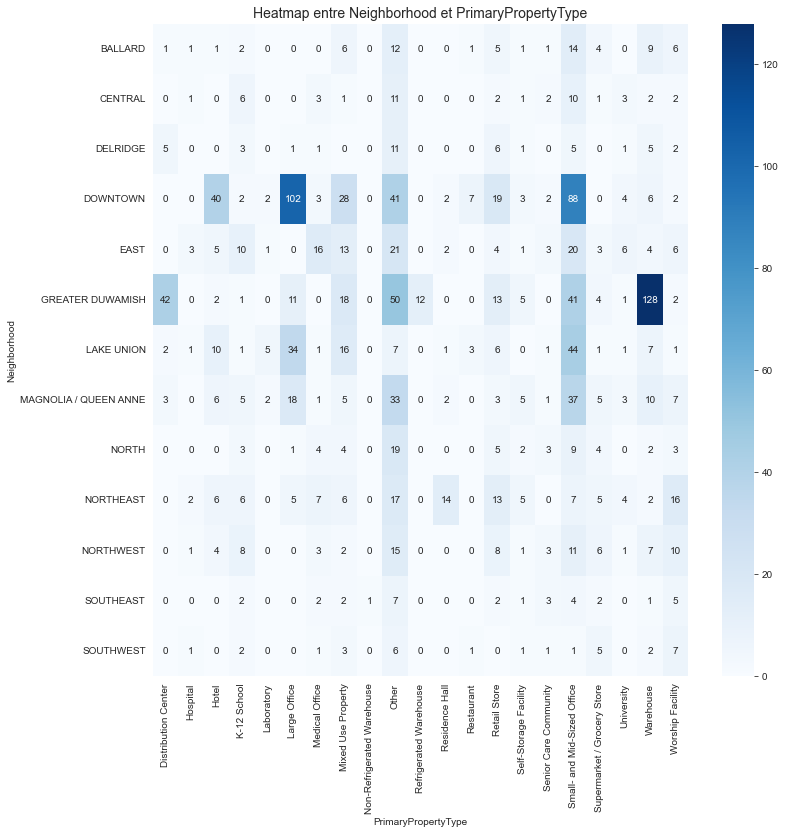

Lien entre : Neighborhood et PrimaryPropertyType
valeur du Chi2 : 1419.51
valeur de la p-value : 0.000000
nombre de degrés de liberté : 240


In [148]:
tab_cont('Neighborhood', 'PrimaryPropertyType', df5_log)

Les quartiers DOWNTOWN et GREATER DUWAMISH ont le plus de batiments.

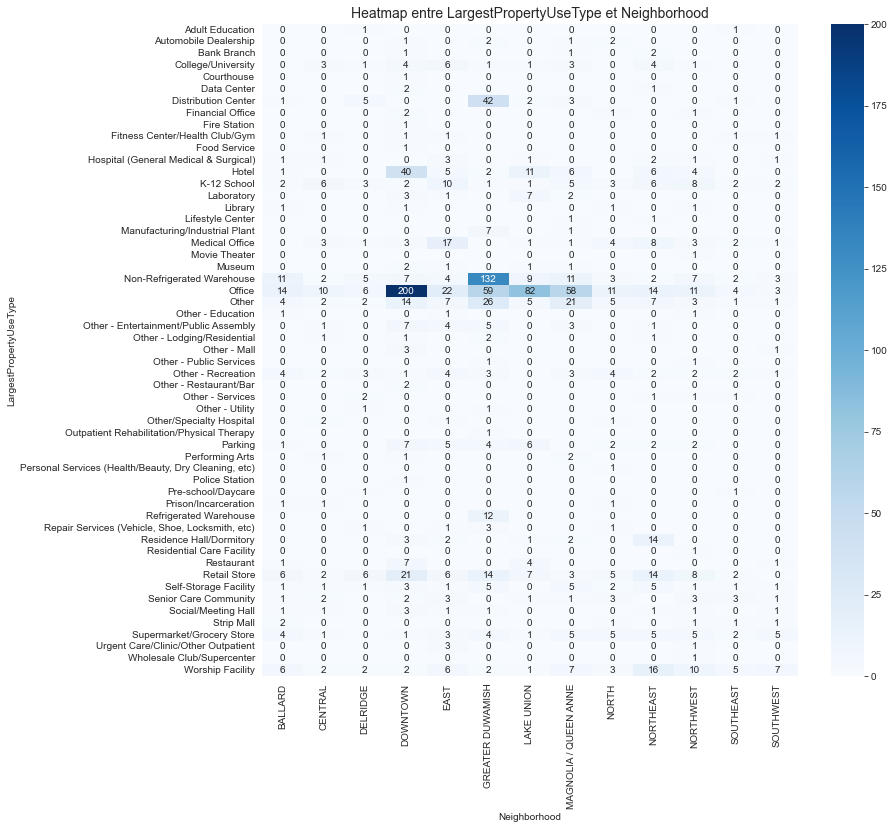

Lien entre : LargestPropertyUseType et Neighborhood
valeur du Chi2 : 1930.31
valeur de la p-value : 0.000000
nombre de degrés de liberté : 648


In [149]:
tab_cont('LargestPropertyUseType', 'Neighborhood', df5_log)

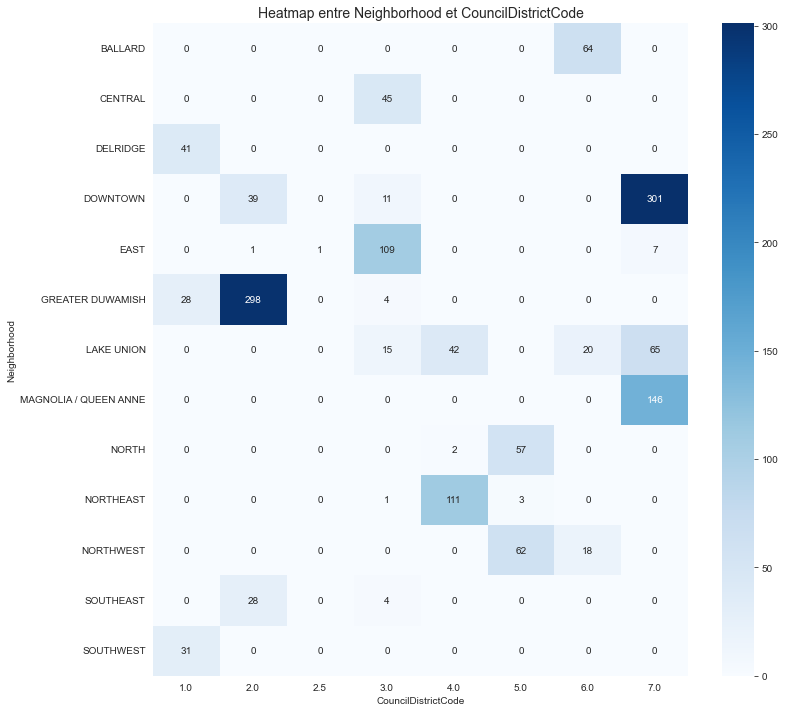

Lien entre : Neighborhood et CouncilDistrictCode
valeur du Chi2 : 6992.23
valeur de la p-value : 0.000000
nombre de degrés de liberté : 84


In [150]:
tab_cont('Neighborhood','CouncilDistrictCode', df5_log)

Ces 2 variables sont liées, on va partir sur Neighborhood qui est plus explicite.

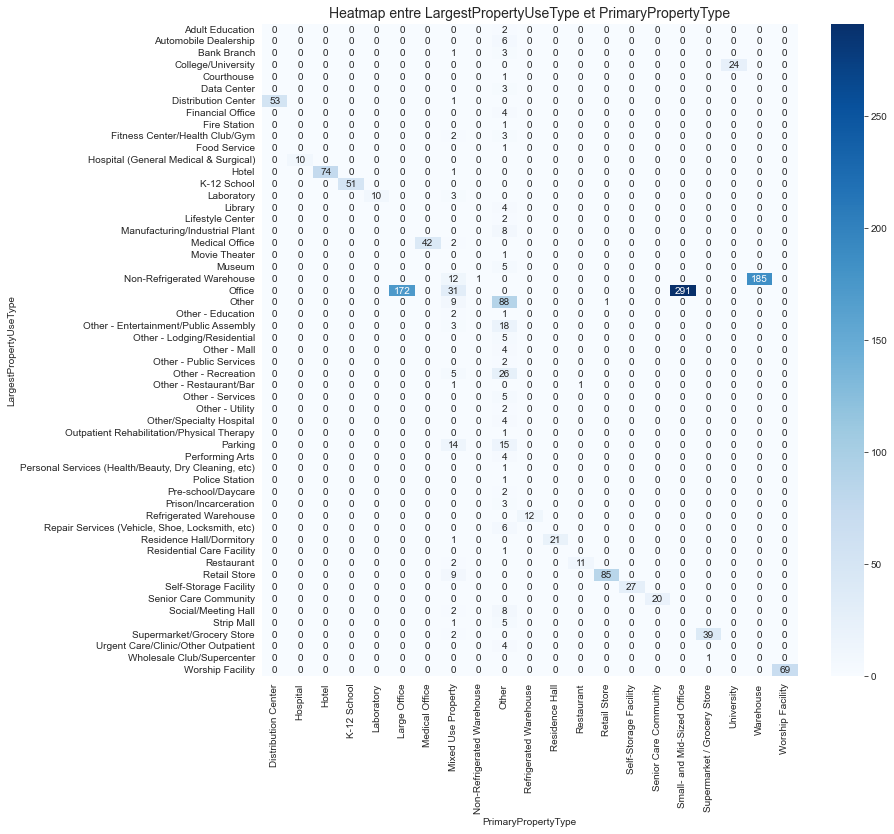

Lien entre : LargestPropertyUseType et PrimaryPropertyType
valeur du Chi2 : 25234.96
valeur de la p-value : 0.000000
nombre de degrés de liberté : 1080


In [151]:
tab_cont('LargestPropertyUseType', 'PrimaryPropertyType', df5_log)

PrimaryPropertyType et LargestPropertyUseType sont liées car beaucoup d'effectifs nuls (excepté pour other) => informations redondantes.

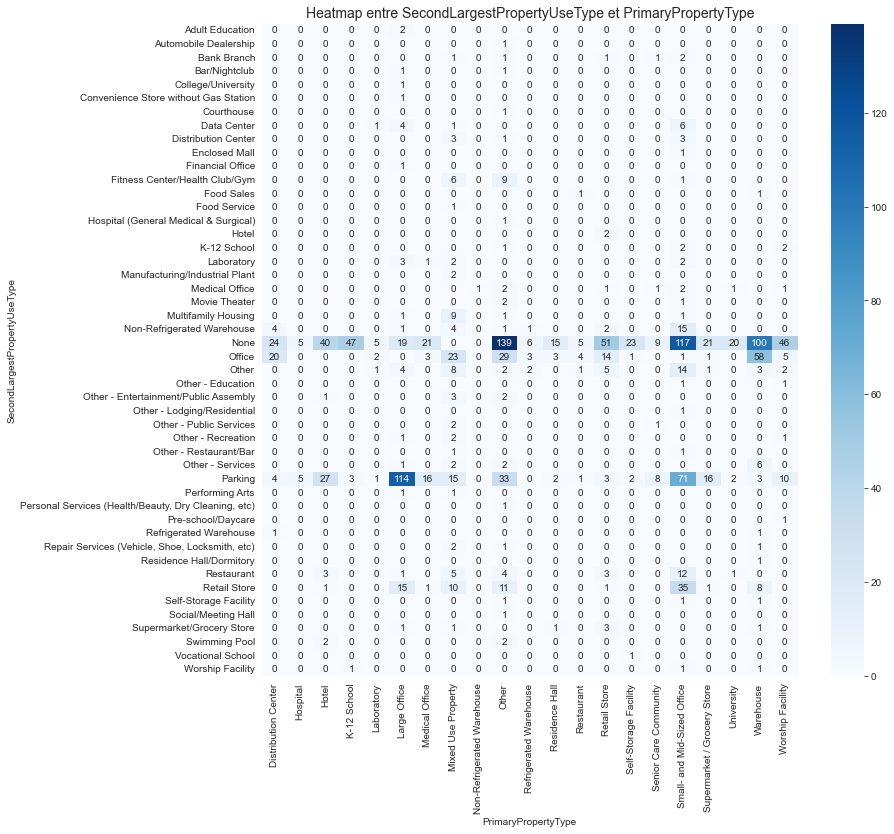

Lien entre : SecondLargestPropertyUseType et PrimaryPropertyType
valeur du Chi2 : 1793.34
valeur de la p-value : 0.000000
nombre de degrés de liberté : 940


In [152]:
tab_cont('SecondLargestPropertyUseType', 'PrimaryPropertyType', df5_log)

Le SecondLargestPropertyUseType est souvent des parkings, que l'on trouve dans tous les PrimaryPropertyType, sauf 1. Ici aussi, beaucoup de valeurs à 0.

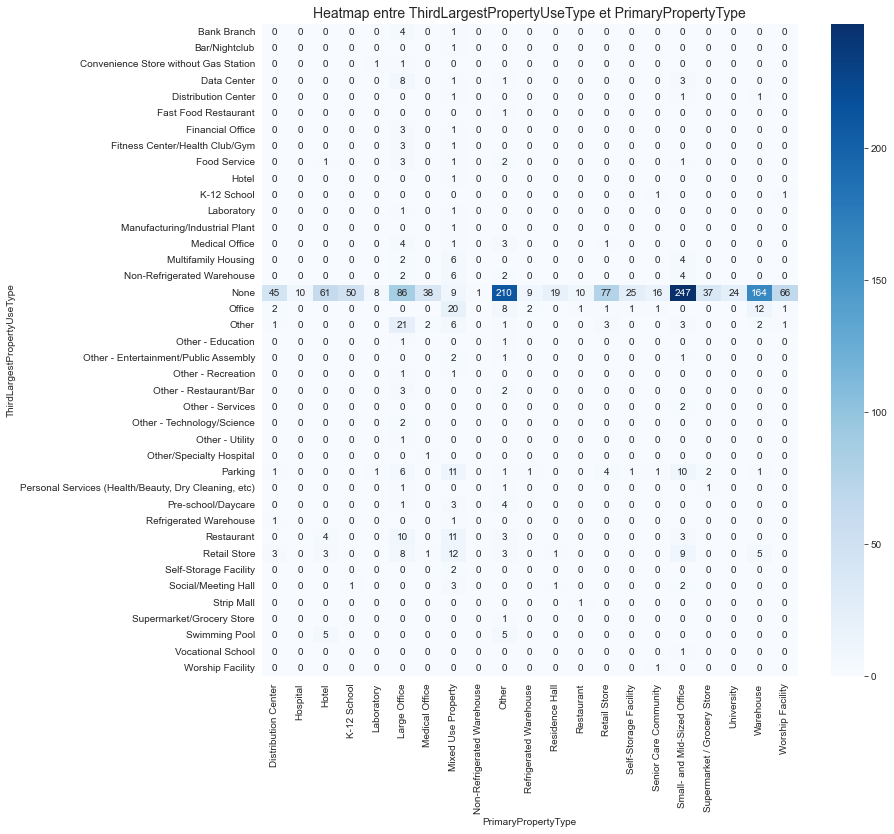

Lien entre : ThirdLargestPropertyUseType et PrimaryPropertyType
valeur du Chi2 : 1376.62
valeur de la p-value : 0.000000
nombre de degrés de liberté : 780


In [153]:
tab_cont('ThirdLargestPropertyUseType', 'PrimaryPropertyType', df5_log)

#### Quelques liens variables numériques / catégorielles

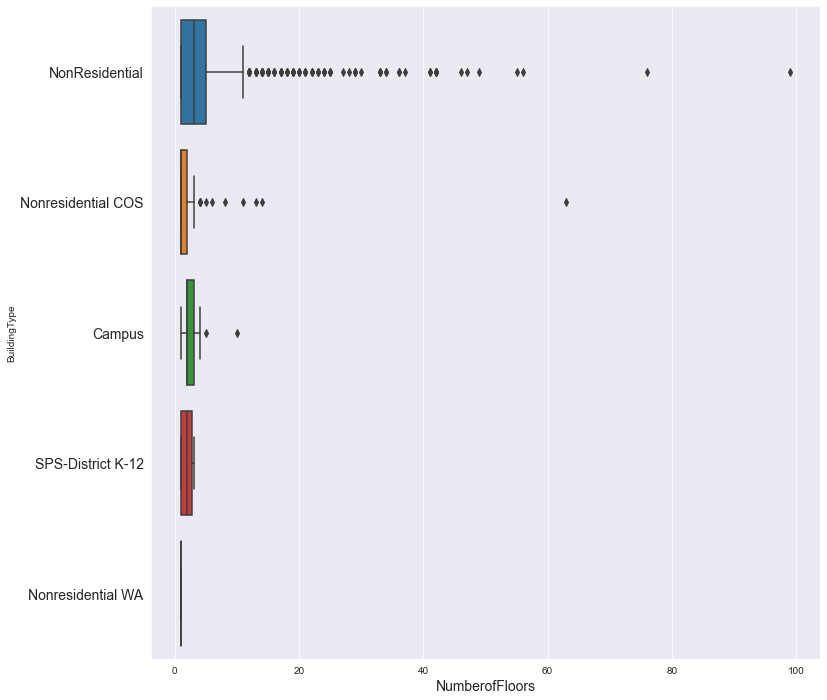

In [154]:
boxplot('NumberofFloors','BuildingType',df5_log)

Pas mal d'outliers pour NonResidential

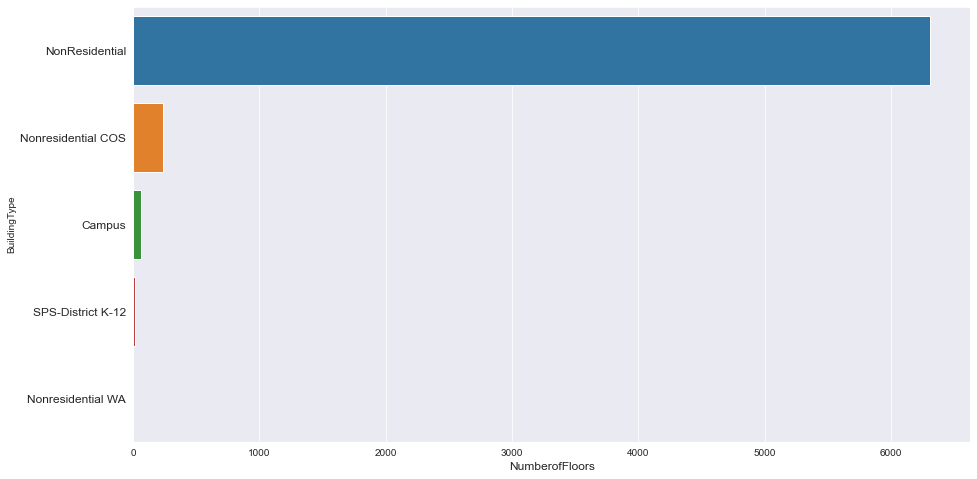

In [155]:
barplot('NumberofFloors','BuildingType',df5_log)

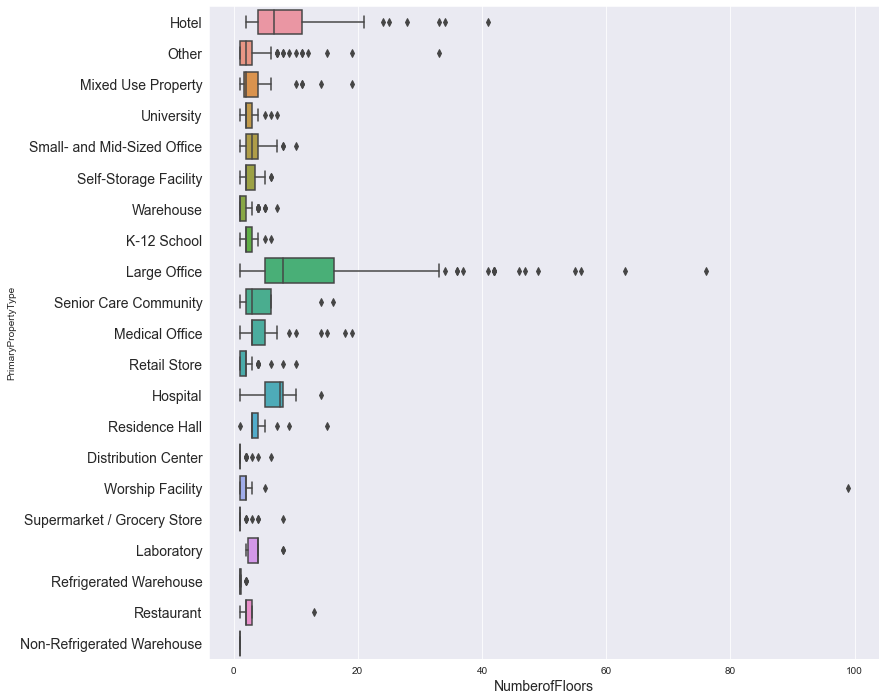

In [156]:
boxplot('NumberofFloors','PrimaryPropertyType',df5_log)

1 outlier avec beaucoup d'étages. Ce sont surtout les Large Office qui ont une plus grande distribution de NumberofFloors, puis les Hotel.

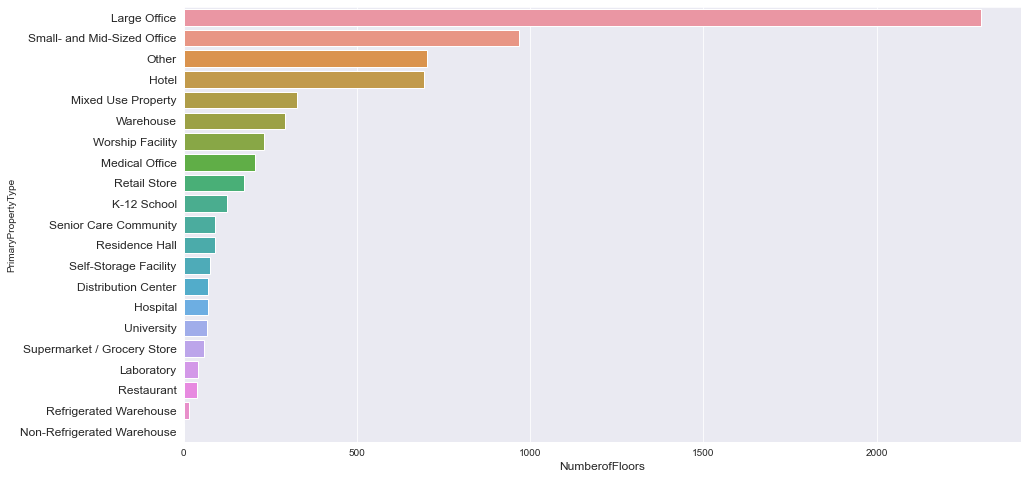

In [157]:
barplot('NumberofFloors','PrimaryPropertyType',df5_log)

Très majoritairement les Large Office qui ont le plus d'étages.

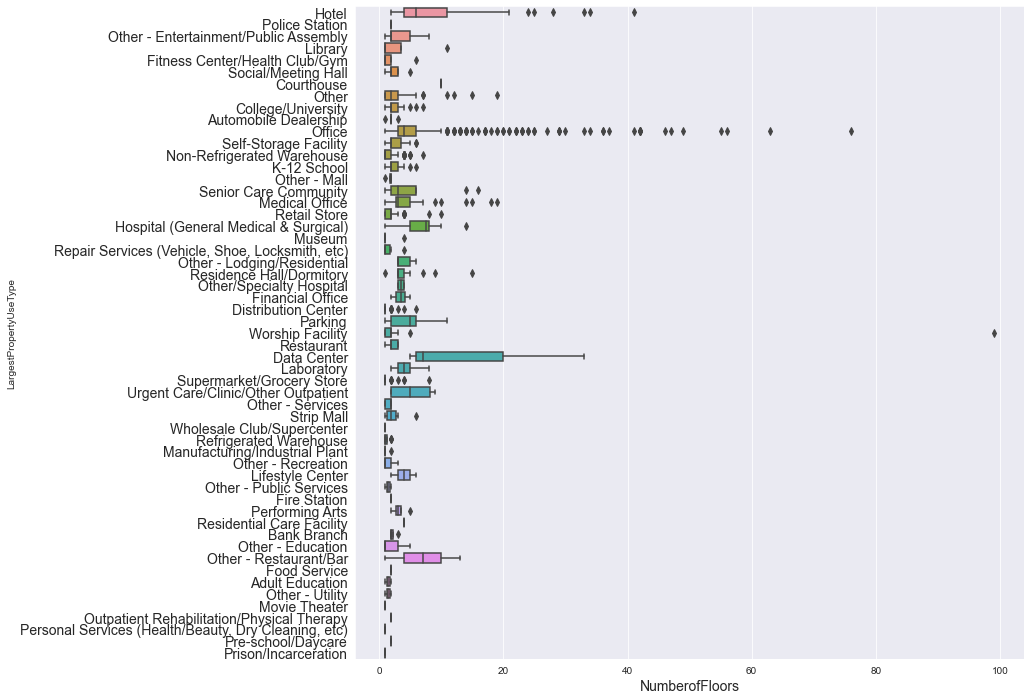

In [158]:
boxplot('NumberofFloors','LargestPropertyUseType',df5_log)

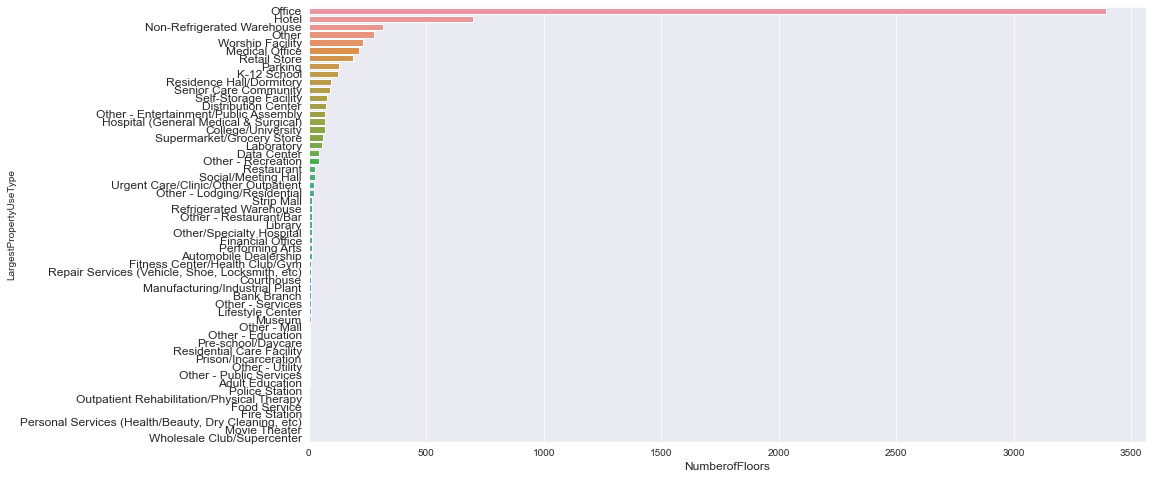

In [159]:
barplot('NumberofFloors','LargestPropertyUseType',df5_log)

Là aussi, très majoritairement les Offices avec le plus d'étages.

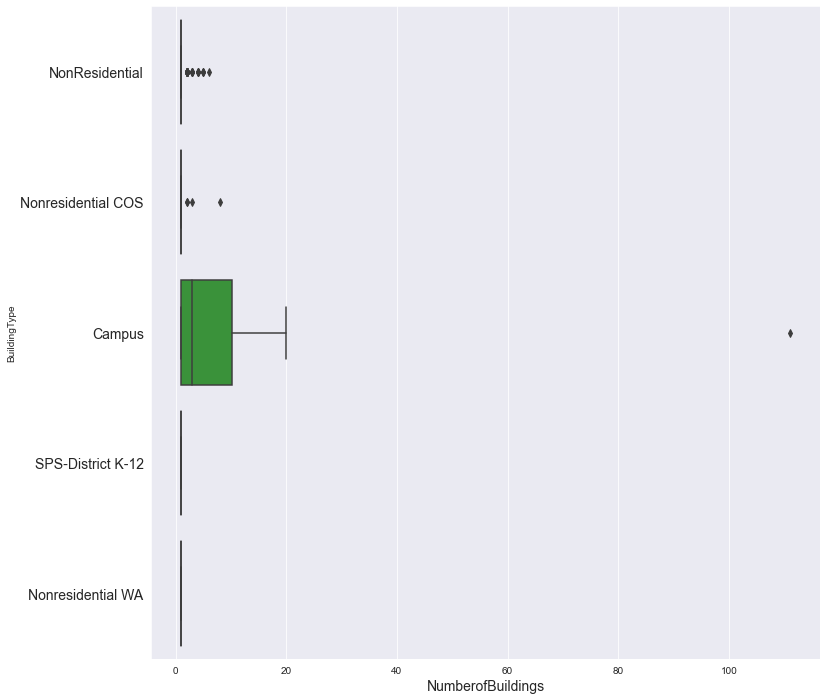

In [160]:
boxplot('NumberofBuildings','BuildingType',df5_log)

On voit que les Campus ont un nombre de buildings plus étalé que les autres BuildingType.

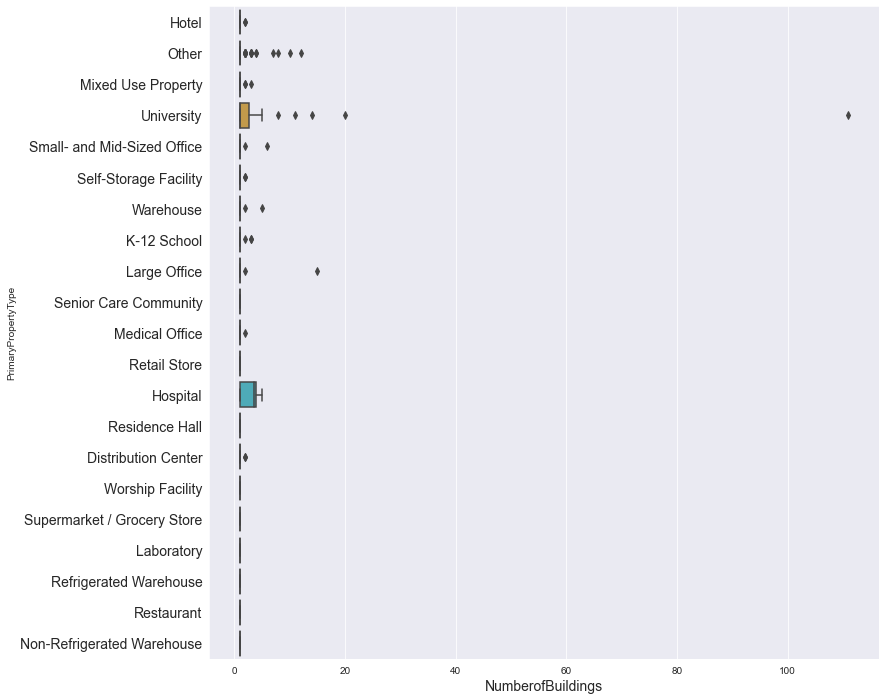

In [161]:
boxplot('NumberofBuildings','PrimaryPropertyType',df5_log)

On voit que les Hospital ont un nombre de buildings plus étalé que les autres PrimaryPropertyType. Un outlier très éloigné dans University.

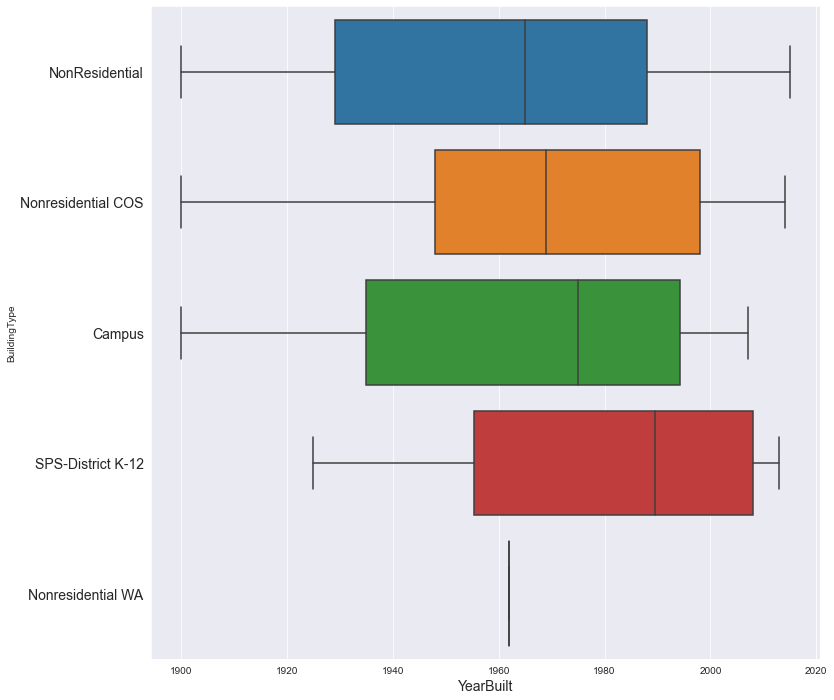

In [162]:
boxplot('YearBuilt','BuildingType',df5_log)

Pas d'outliers

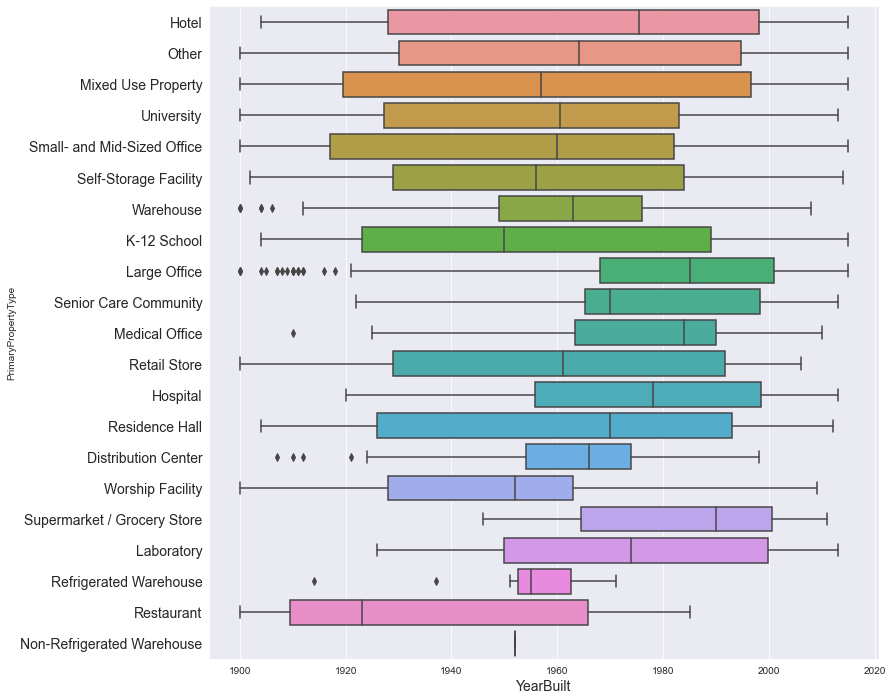

In [163]:
boxplot('YearBuilt','PrimaryPropertyType',df5_log)

YearBuilt ne semble pas trop avoir d'influence, à voir s'il ne vaut pas mieux utiliser l'âge du batiment, à la place.

## 6. Conclusion

33.5% des données sans EnergyScore, on va certainement devoir les supprimer car on ne va pas faire d'imputations dessus. d'autant que l'on veut voir son intérêt.

Des variables sont redondantes, il faudra donc en éliminer certaines pour faire la prédiction de TotalGHGEmissions et SiteEnergyUse(kBtu), notamment au niveau des surfaces.

A voir comment on gère les outliers car ce sont des batiments spécifiques et que l'on ne construit pas souvent.

La variable BuildingType (NonResidential) va être supprimée car PrimaryPropertyType est plus variée. 

On gardera la variable PrimaryPropertyType au profit de la variable LargestPropertyUseType car celle-ci est redondante avec la 1ère.

On remplacera la colonne YearBuilt par BuildingAge, qui est plus parlante.

Pour éviter la fuite de données, et conformément aux données déclaratives d'un permis d'exploitation commerciale, on n'a pas gardé les variables directement liées à la consommation d'énergie. On a gardé les variables en relation avec le batiment en lui-même (surface, nb d'étages, usage, localisation, date construction (ou âge du batiment)).